# Anyone AI - Project III

# Home Credit Default Risk


You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all togheter. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## 1. Introduction

This is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

We will use [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `application_train.csv`: Training dataset you must use to train and find the best hyperparameters on your model.
- `application_test.csv`: Test dataset, use it only when you are done choosing the model and the parameters.
- `HomeCredit_columns_description.csv`: This file contains descriptions for the columns in train and test datasets.


**Don't change anything in this cell, just make it run correctly**

In [ ]:
!pip install gdown

!gdown 1CAhmDRZLsIX1rYmUHOI8n2oatGQKGeHt
!gdown 1jXsI16FglcBCKID1c5Us-WD758D6mWMD
!gdown 1i96_nh9tU0YeQtbLGusjZxVp3cBctDGp

In [1]:
import pandas as pd 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

1.1. Load the training and test datasets using pandas `read_csv()` function. Assign them to `app_train` and `app_test` variables respectively.

In [2]:
### Complete in this cell: Loading the dataset
app_test = pd.read_csv('application_test.csv')
app_train = pd.read_csv('application_train.csv')

**Don't change anything in this cell, just make it run correctly**

In [3]:
if app_train.shape == (215257, 123):
  print('Success: app_train shape is correct!')
else:
  raise ValueError('Train dataset shape is incorrect, please review your code')

if isinstance(app_train, pd.DataFrame):
  print('Success: app_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if app_test.shape == (92254, 123):
  print('Success: app_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(app_test, pd.DataFrame):
  print('Success: app_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!


### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1.2. Print how many samples do we have in our train and test datasets.

In [4]:
### Complete in this cell: shape of the dataset
print(app_test.shape, app_train.shape)

(92254, 123) (215257, 123)


1.3. List all columns in the train dataset.

In [5]:
### Complete in this cell: Show all columns in the training dataset 
pd.set_option('display.max_columns', None)
app_train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,187399,317244,0,Cash loans,F,Y,Y,1,202500.0,640080.0,29970.0,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.005313,-8986,-377,-8696.0,-1399,15.0,1,1,0,1,0,0,Core staff,3.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,School,NaN,0.374166,0.673830,0.0711,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0877,NaN,0.0435,NaN,NaN,0.0725,0.0907,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0897,NaN,0.0453,NaN,NaN,0.0718,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0892,NaN,0.0443,NaN,NaN,reg oper account,block of flats,0.0588,Panel,No,0.0,0.0,0.0,0.0,-234.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,84777,198357,0,Cash loans,M,N,Y,0,135000.0,647046.0,19048.5,463500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018850,-13826,-7128,-4097.0,-4321,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,SATURDAY,10,0,0,0,0,0,0,Industry: type 11,NaN,0.420803,0.526295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1896.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
2,268140,410700,0,Cash loans,F,N,Y,0,135000.0,1078200.0,31653.0,900000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.030755,-22160,-4968,-10584.0,-4155,NaN,1,1,0,1,1,0,High skill tech staff,1.0,2,2,FRIDAY,12,0,0,0,0,0,0,Transport: type 4,NaN,0.502320,0.586740,0.1464,0.1060,0.9861,0.8096,0.0121,0.16,0.1379,0.3333,0.2083,0.0000,0.1189,0.1500,0.0019,0.0012,0.1481,0.1096,0.9856,0.8105,0.0,0.1611,0.1379,0.3333,0.0417,0.0000,0.1286,0.1544,0.0,0.0,0.1478,0.1060,0.9861,0.8121,0.0122,0.16,0.1379,0.3333,0.2083,0.0000,0.121,0.1527,0.0019,0.0013,reg o

1.4. Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [6]:
### Complete in this cell: show first 5 records in a transposed table
pd.set_option('display.max_rows', None)
five_records = app_train.head()
five_records.T

,0,1,2,3,4
Unnamed: 0,187399,84777,268140,270686,33785
SK_ID_CURR,317244,198357,410700,413785,139141
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,F,F
FLAG_OWN_CAR,Y,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,1,0,0,0,0
AMT_INCOME_TOTAL,202500.0,135000.0,135000.0,202500.0,54000.0
AMT_CREDIT,640080.0,647046.0,1078200.0,1223010.0,97038.0


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

<AxesSubplot:xlabel='TARGET', ylabel='count'>

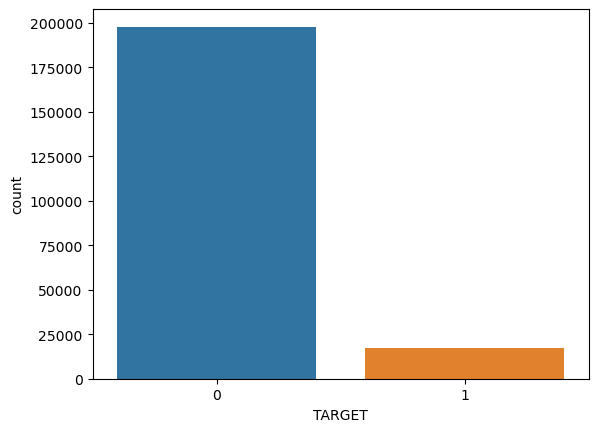

In [7]:
### Complete in this cell: show distribution of target variable
sns.countplot(data=app_train, x='TARGET')

1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [8]:
### Complete in this cell: show number of columns per data type
int_columns = five_records.select_dtypes(include='int64')
float_columns = five_records.select_dtypes(include='float64')
obj_columns = five_records.select_dtypes(include='object')
print(f'float64: {float_columns.shape[1]}\nint64: {int_columns.shape[1]}\nobject: {obj_columns.shape[1]}')

float64: 65
int64: 42
object: 16


1.7. For categorical variables, show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [9]:
### Complete in this cell: show number of unique values per categorical column
obj_columns = app_train.select_dtypes(include='object')
obj_columns.nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [10]:
### Complete in this cell: checking missing data
percentage = (app_train.isnull().sum().sort_values(ascending=False)[:20] / app_train.shape[0] * 100).round(2)
missing_per = pd.DataFrame(percentage, columns=['Percent'])

In [11]:
total = app_train.isnull().sum().sort_values(ascending=False)[:20]
missing_count = pd.DataFrame(total, columns=['Total'])

In [12]:
missing_per.join(missing_count)

,Percent,Total
COMMONAREA_AVG,69.87,150393
COMMONAREA_MODE,69.87,150393
COMMONAREA_MEDI,69.87,150393
NONLIVINGAPARTMENTS_MODE,69.44,149483
NONLIVINGAPARTMENTS_AVG,69.44,149483
NONLIVINGAPARTMENTS_MEDI,69.44,149483
FONDKAPREMONT_MODE,68.39,147217
LIVINGAPARTMENTS_MODE,68.36,147144
LIVINGAPARTMENTS_MEDI,68.36,147144
LIVINGAPARTMENTS_AVG,68.36,147144


**Analyzing distribution of variables**

In [13]:
app_train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,187399,317244,0,Cash loans,F,Y,Y,1,202500.0,640080.0,29970.0,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.005313,-8986,-377,-8696.0,-1399,15.0,1,1,0,1,0,0,Core staff,3.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,School,NaN,0.374166,0.673830,0.0711,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0877,NaN,0.0435,NaN,NaN,0.0725,0.0907,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0897,NaN,0.0453,NaN,NaN,0.0718,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0892,NaN,0.0443,NaN,NaN,reg oper account,block of flats,0.0588,Panel,No,0.0,0.0,0.0,0.0,-234.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,84777,198357,0,Cash loans,M,N,Y,0,135000.0,647046.0,19048.5,463500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018850,-13826,-7128,-4097.0,-4321,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,SATURDAY,10,0,0,0,0,0,0,Industry: type 11,NaN,0.420803,0.526295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1896.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
2,268140,410700,0,Cash loans,F,N,Y,0,135000.0,1078200.0,31653.0,900000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.030755,-22160,-4968,-10584.0,-4155,NaN,1,1,0,1,1,0,High skill tech staff,1.0,2,2,FRIDAY,12,0,0,0,0,0,0,Transport: type 4,NaN,0.502320,0.586740,0.1464,0.1060,0.9861,0.8096,0.0121,0.16,0.1379,0.3333,0.2083,0.0000,0.1189,0.1500,0.0019,0.0012,0.1481,0.1096,0.9856,0.8105,0.0,0.1611,0.1379,0.3333,0.0417,0.0000,0.1286,0.1544,0.0,0.0,0.1478,0.1060,0.9861,0.8121,0.0122,0.16,0.1379,0.3333,0.2083,0.0000,0.121,0.1527,0.0019,0.0013,reg o

1.9. Show the distribution of credit amounts.

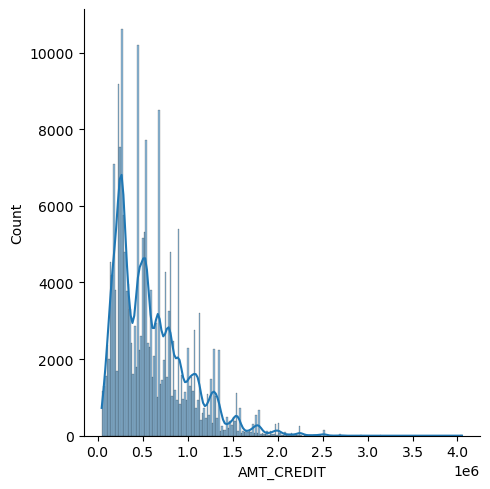

In [14]:
### Complete in this cell: distribution of credit amounts
sns.displot(x='AMT_CREDIT', data=app_train, kde=True)

1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

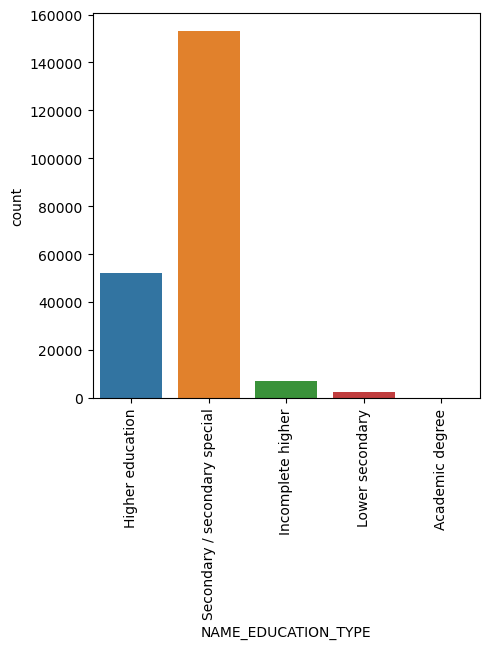

In [15]:
### Complete in this cell: level of education plot
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

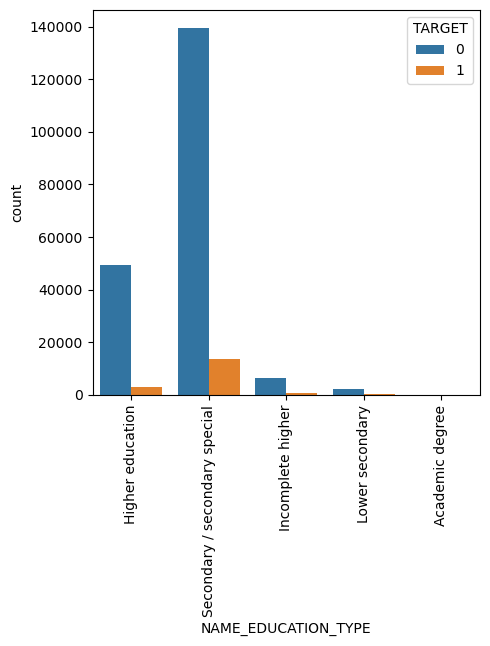

In [16]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train, hue='TARGET')

1.11. Plot the distribution of ocupation of the loan applicants

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

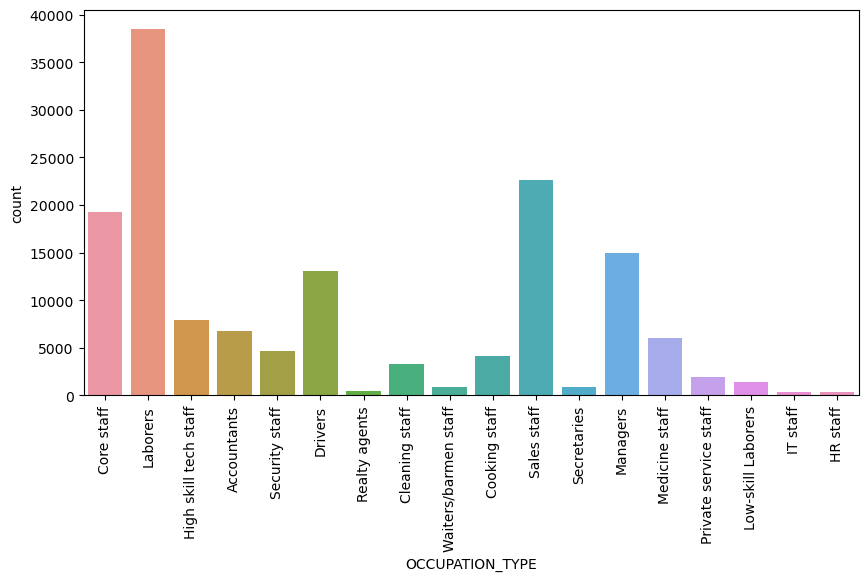

In [17]:
### Complete in this cell: ocupation of applicants
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE', data=app_train)

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

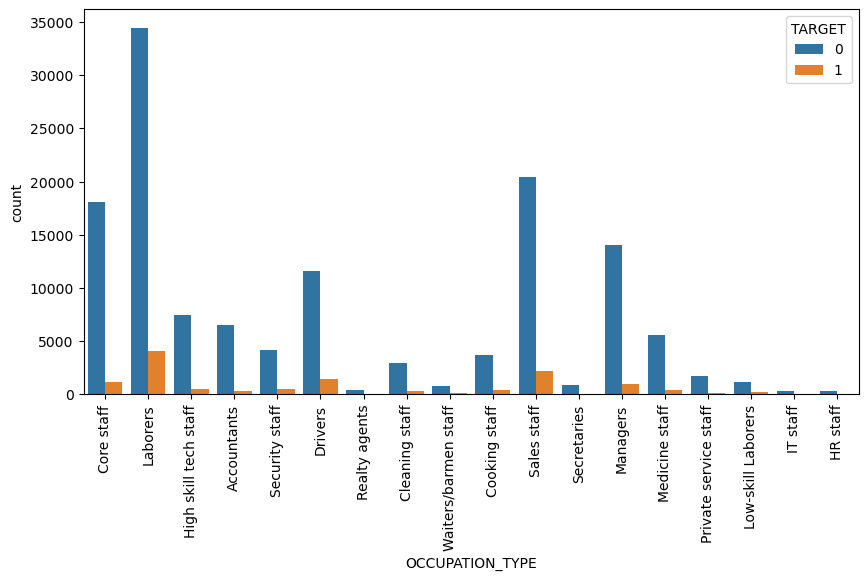

In [18]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE', data=app_train, hue='TARGET')

1.12. Plot the family status of the applicants

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

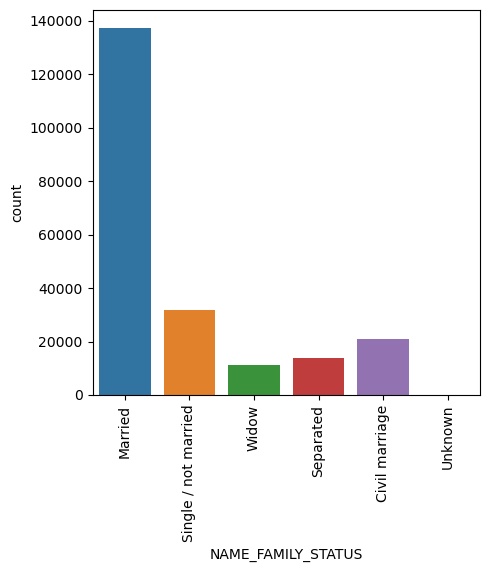

In [19]:
### Complete in this cell: family status
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_FAMILY_STATUS', data=app_train)

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

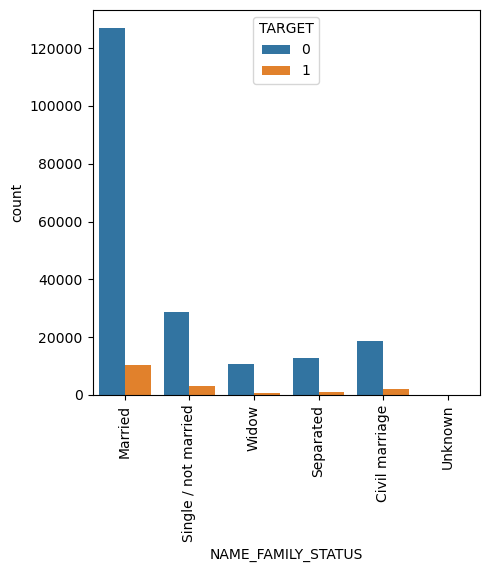

In [20]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_FAMILY_STATUS', data=app_train, hue='TARGET')

1.13. Plot the income type of applicants grouped by the target variable

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

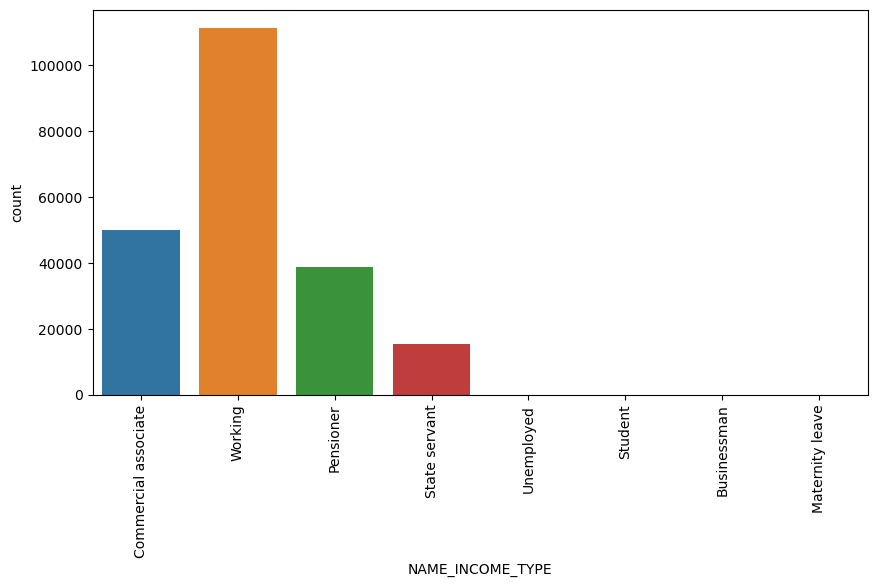

In [21]:
### Complete in this cell: income type 
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_INCOME_TYPE', data=app_train)

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

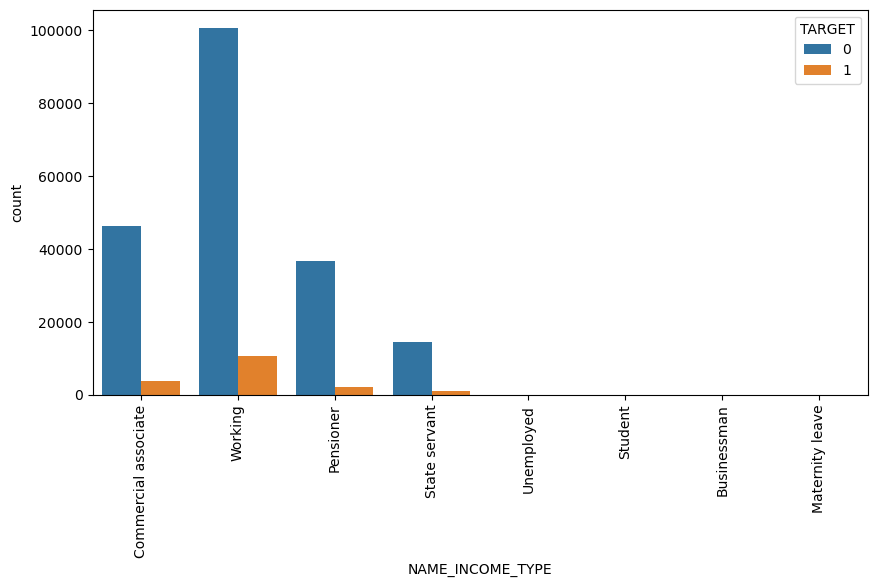

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_INCOME_TYPE', data=app_train, hue='TARGET')

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

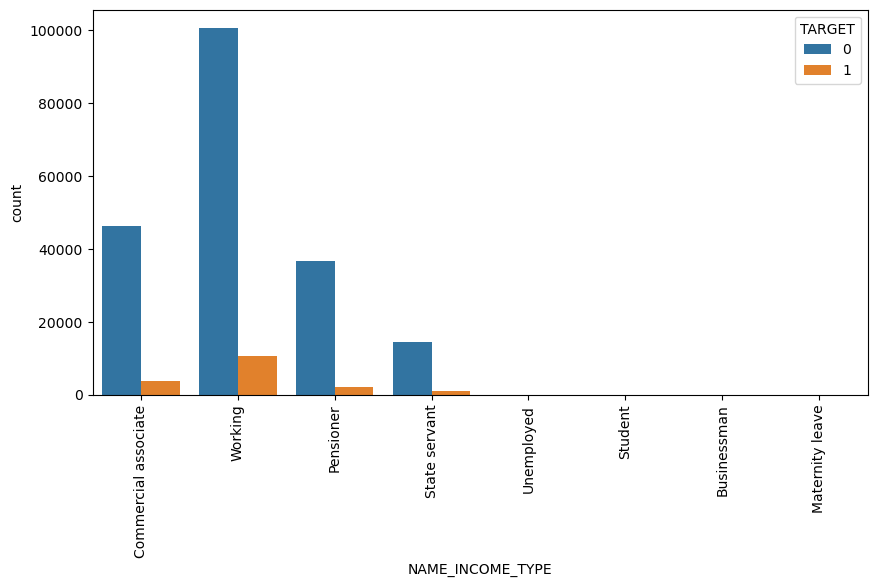

In [23]:
### Complete in this cell: Income type of applicants by target variable
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='NAME_INCOME_TYPE', data=app_train, hue='TARGET')

## 2. Preprocessing

## Numerical data analysis

In [24]:
# Create a subset with the numerical columns of each numercial data type
int_columns_data = app_train.select_dtypes(include='int64')
float_columns_data = app_train.select_dtypes(include='float64')

In [25]:
# Drop irrelevants columns
int_columns_data.drop(['Unnamed: 0', 'SK_ID_CURR'], axis=1, inplace=True)

In [26]:
# Check 
int_columns_data.head()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,-8986,-377,-1399,1,1,0,1,0,0,2,2,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-13826,-7128,-4321,1,1,0,1,0,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-22160,-4968,-4155,1,1,0,1,1,0,2,2,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,-16926,-2275,-381,1,1,0,1,1,0,2,2,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,-16333,-8925,-4143,1,1,0,1,0,0,2,2,16,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Overview
float_columns_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,640080.0,29970.0,450000.0,0.005313,-8696.0,15.0,3.0,NaN,0.374166,0.673830,0.0711,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0877,NaN,0.0435,NaN,NaN,0.0725,0.0907,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0897,NaN,0.0453,NaN,NaN,0.0718,0.0874,0.9841,NaN,NaN,NaN,0.1724,0.1667,0.0417,0.0892,NaN,0.0443,NaN,NaN,0.0588,0.0,0.0,0.0,0.0,-234.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135000.0,647046.0,19048.5,463500.0,0.018850,-4097.0,NaN,2.0,NaN,0.420803,0.526295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1896.0,0.0,0.0,0.0,0.0,1.0,5.0
2,135000.0,1078200.0,31653.0,900000.0,0.030755,-10584.0,NaN,1.0,NaN,0.502320,0.586740,0.1464,0.1060,0.9861,0.8096,0.0121,0.16,0.1379,0.3333,0.2083,0.0000,0.1189,0.1500,0.0019,0.0012,0.1481,0.1096,0.9856,0.8105,0.0,0.1611,0.1379,0.3333,0.0417,0.0000,0.1286,0.1544,0.0,0.0,0.1478,0.1060,0.9861,0.8121,0.0122,0.16,0.1379,0.3333,0.2083,0.0000,0.121,0.1527,0.0019,0.0013,0.1327,0.0,0.0,0.0,0.0,-2504.0,0.0,0.0,0.0,0.0,0.0,1.0
3,202500.0,1223010.0,51948.0,1125000.0,0.035792,-2.0,NaN,2.0,0.600451,0.267774,0.380800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,54000.0,97038.0,7029.0,81000.0,0.028663,-6248.0,NaN,2.0,0.797295,0.411818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1492.0,0.0,0.0,0.0,0.0,0.0,7.0


### Missing data analysis

In [28]:
# Check the missing values of the integer columns dtype
int_columns_data.isnull().sum().sort_values(ascending=False)[:10]

TARGET              0
CNT_CHILDREN        0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_11    0
dtype: int64

In [29]:
# Check the missing values of the float columns dtypes
float_missing_data = float_columns_data.isnull().sum().sort_values(ascending=False)
float_missing_data = pd.DataFrame(float_missing_data, columns=['Count'])
float_missing_data['Percentage'] = float_missing_data['Count'] / app_train.shape[0] # The column 'Percetage' refers to the percentage of missing values to the variable that belongs.
float_missing_data

,Count,Percentage
COMMONAREA_MODE,150393,0.698667
COMMONAREA_MEDI,150393,0.698667
COMMONAREA_AVG,150393,0.698667
NONLIVINGAPARTMENTS_MODE,149483,0.694440
NONLIVINGAPARTMENTS_MEDI,149483,0.694440
NONLIVINGAPARTMENTS_AVG,149483,0.694440
LIVINGAPARTMENTS_MODE,147144,0.683574
LIVINGAPARTMENTS_MEDI,147144,0.683574
LIVINGAPARTMENTS_AVG,147144,0.683574
FLOORSMIN_MEDI,146070,0.678584


### Now I will divide the analysis in three parts, relative a percentage of missing values of each column:
#### Part 1: 0 < missing values < 0.2
#### Part 2: 0.2 < missing values < 0.6
#### Part 3: 0.6 < missing values 

# PART 1

In [30]:
# Create a subset refer before
float_missing_less_twty = float_missing_data[(float_missing_data['Count'] != 0) & (float_missing_data['Percentage'] < 0.2)]
float_missing_less_twty

,Count,Percentage
EXT_SOURCE_3,42695,0.198344
AMT_REQ_CREDIT_BUREAU_HOUR,29162,0.135475
AMT_REQ_CREDIT_BUREAU_DAY,29162,0.135475
AMT_REQ_CREDIT_BUREAU_WEEK,29162,0.135475
AMT_REQ_CREDIT_BUREAU_MON,29162,0.135475
AMT_REQ_CREDIT_BUREAU_QRT,29162,0.135475
AMT_REQ_CREDIT_BUREAU_YEAR,29162,0.135475
OBS_30_CNT_SOCIAL_CIRCLE,716,0.003326
DEF_30_CNT_SOCIAL_CIRCLE,716,0.003326
OBS_60_CNT_SOCIAL_CIRCLE,716,0.003326


In [31]:
# Descriptive statistics
app_train[float_missing_less_twty.index].describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS
count,172562.000000,186095.000000,186095.000000,186095.000000,186095.000000,186095.000000,186095.000000,214541.000000,214541.000000,214541.000000,214541.000000,2.147790e+05,2.150520e+05,215248.000000,215256.000000
mean,0.510766,0.006405,0.006937,0.034155,0.268057,0.263634,1.897762,1.420805,0.142751,1.403680,0.099366,5.140014e-01,5.371383e+05,27056.947198,2.152196
std,0.194775,0.084105,0.110154,0.203716,0.921028,0.611185,1.869271,2.432874,0.448286,2.410927,0.362846,1.911407e-01,3.685515e+05,14494.081637,0.911011
min,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,1615.500000,1.000000
25%,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.914646e-01,2.385000e+05,16456.500000,2.000000
50%,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.654027e-01,4.500000e+05,24840.000000,2.000000
75%,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,6.636805e-01,6.795000e+05,34596.000000,3.000000
max,0.896010,4.000000,9.000000,8.000000,27.000000,8.000000,23.000000,348.000000,34.000000,344.000000,24.000000,8.549997e-01,4.050000e+06,258025.500000,20.000000


#### Data visualization

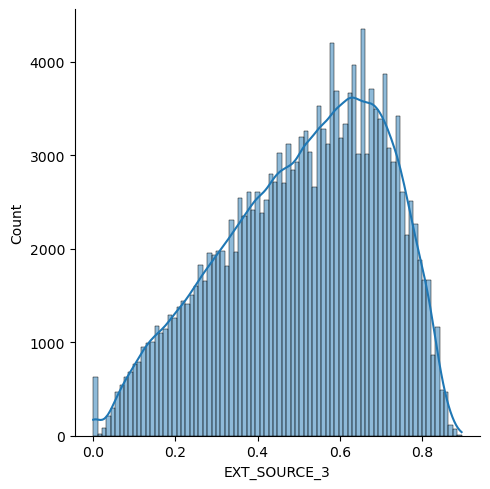

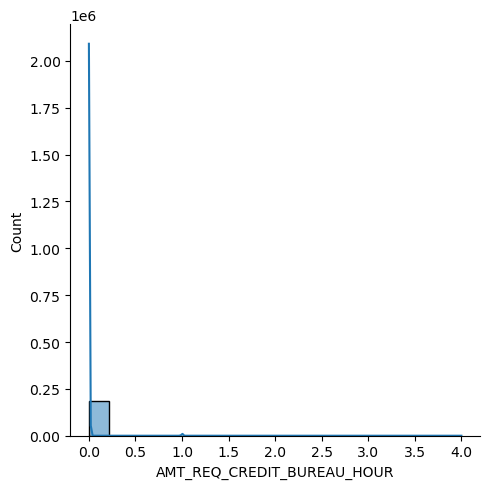

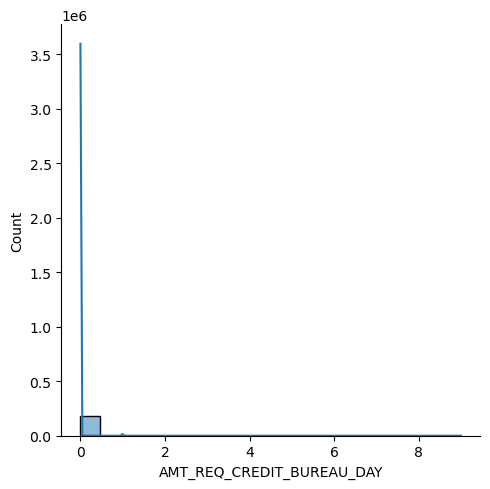

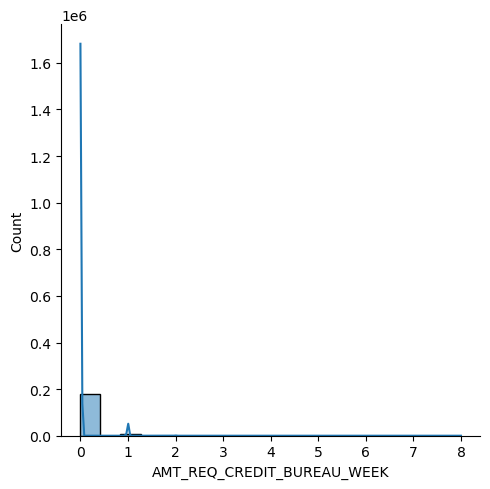

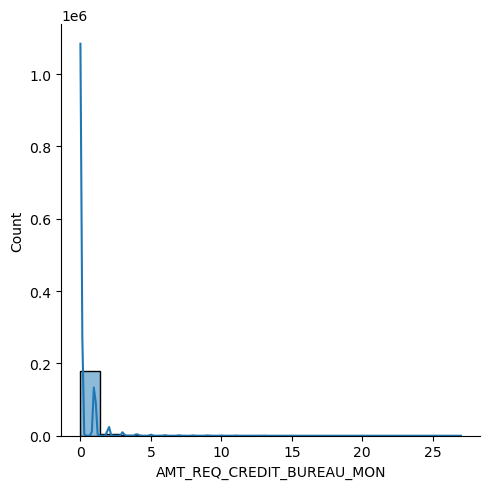

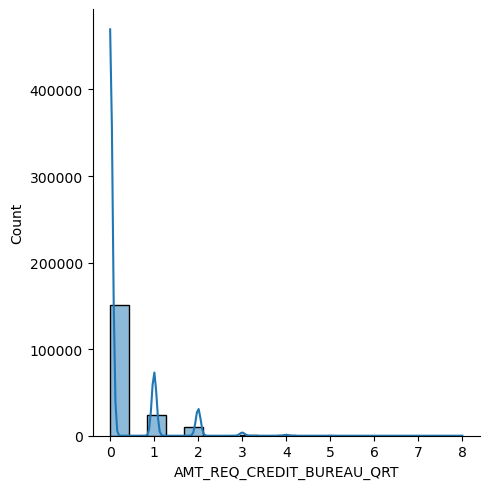

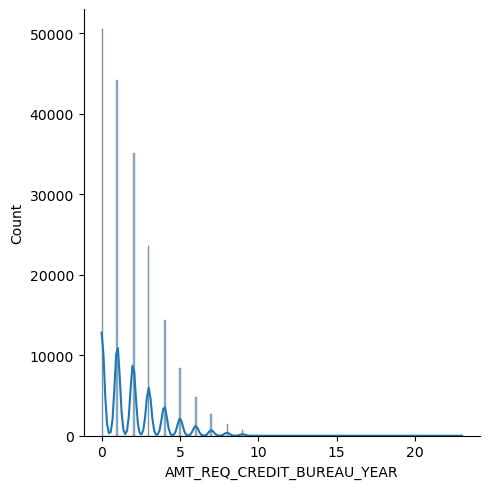

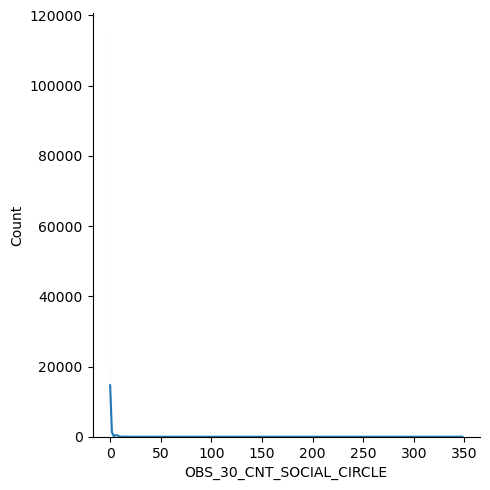

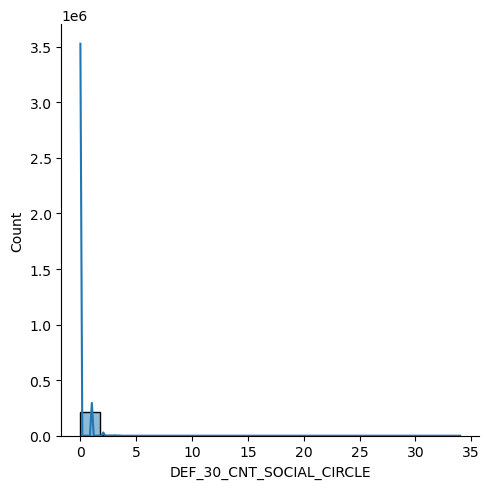

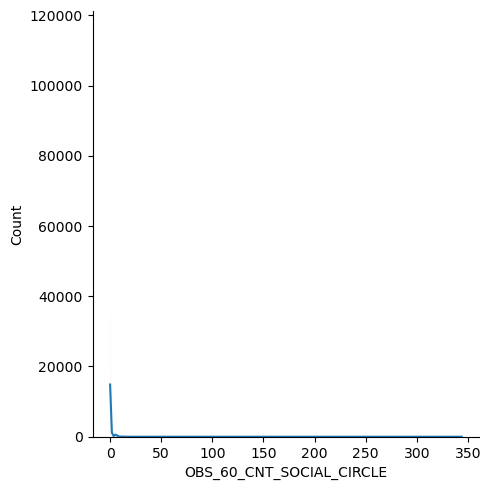

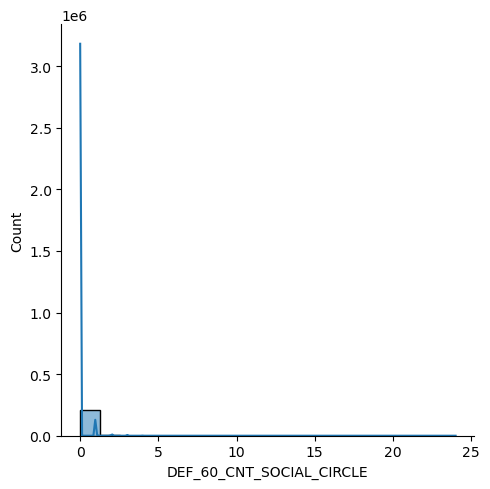

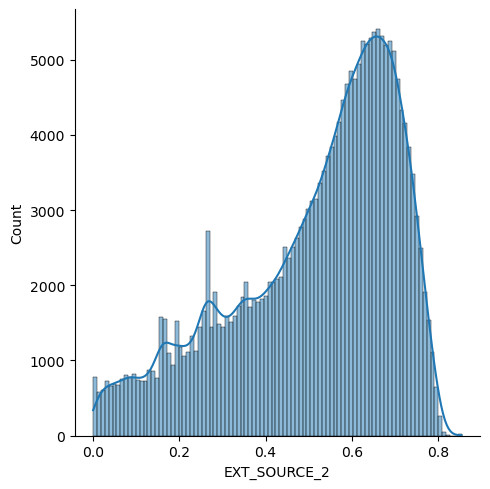

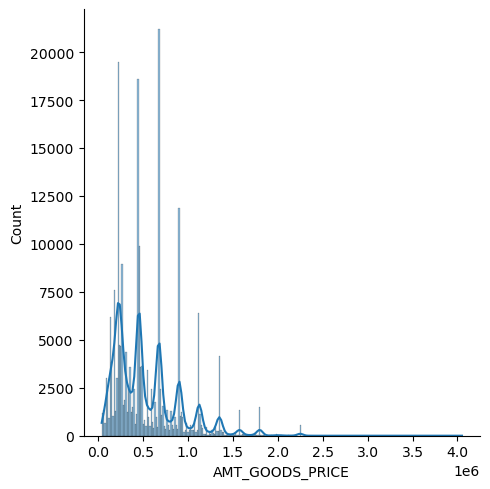

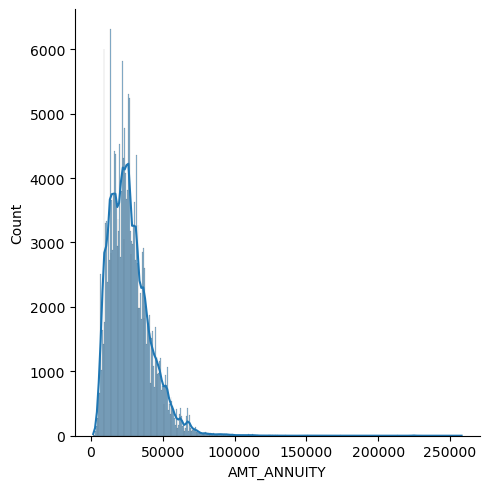

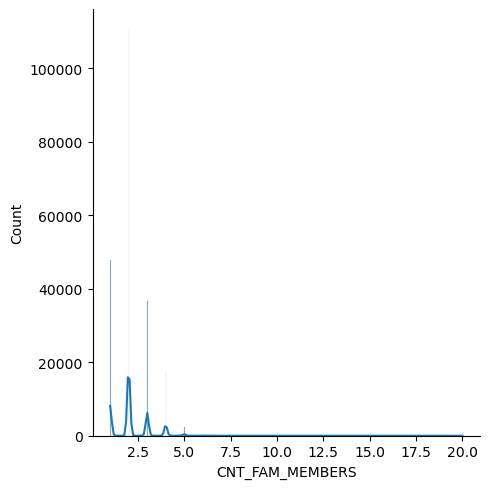

In [32]:
for i in float_missing_less_twty.index:
    sns.displot(x=i, data=app_train, kde=True)

#### Box Plot visualization

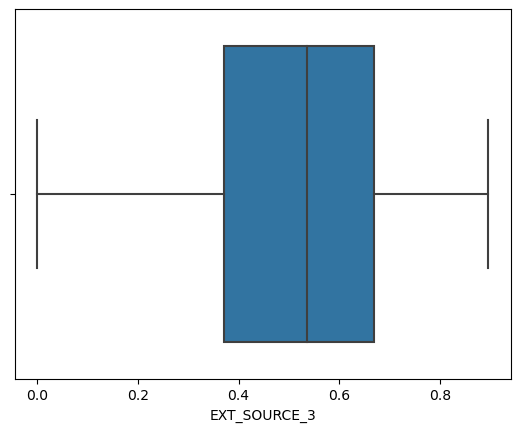

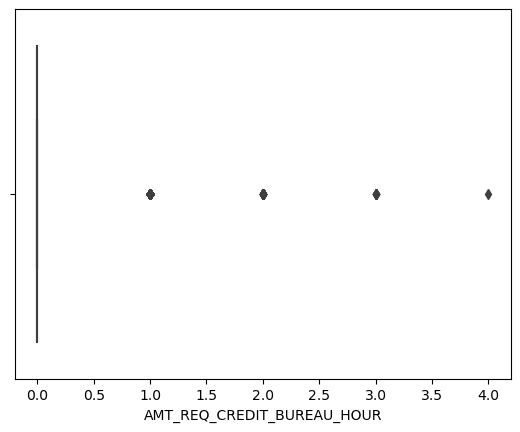

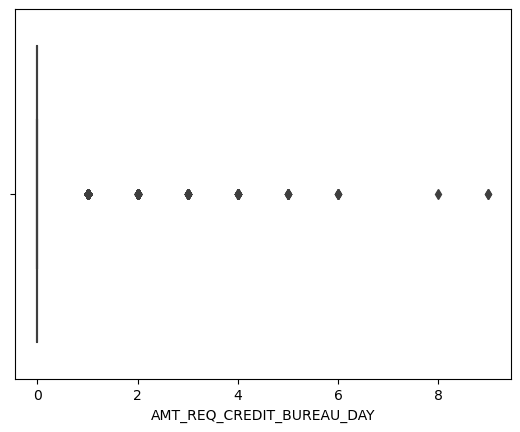

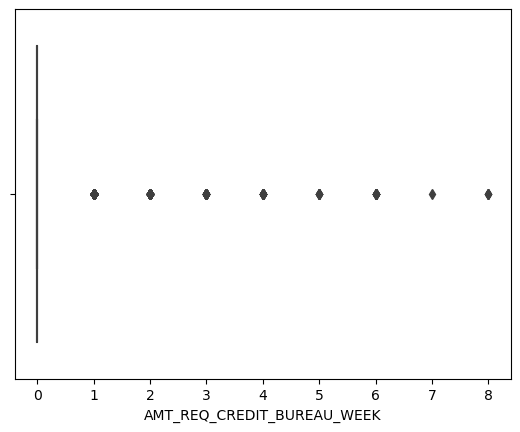

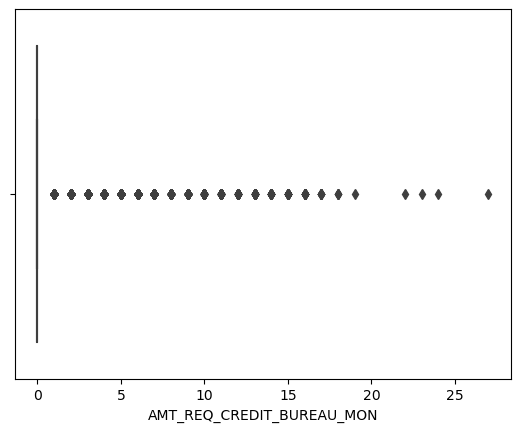

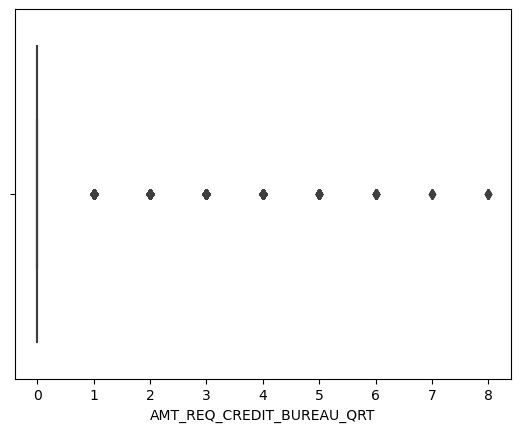

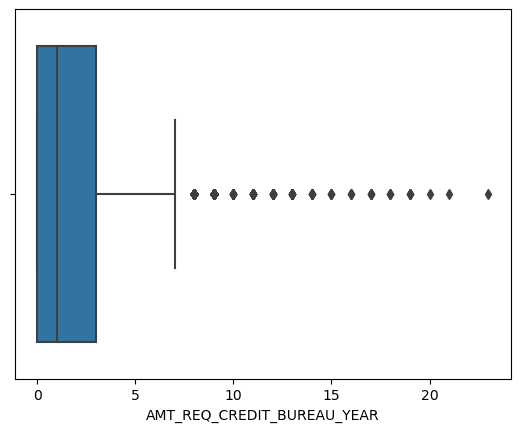

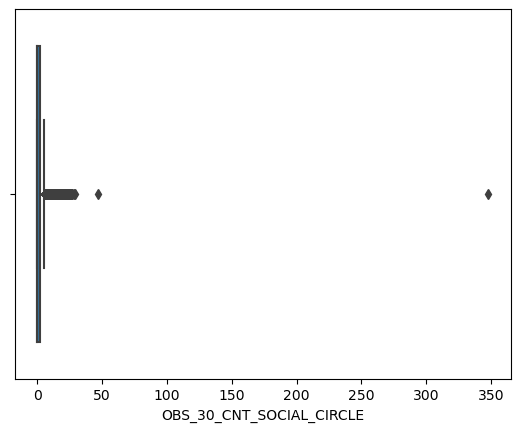

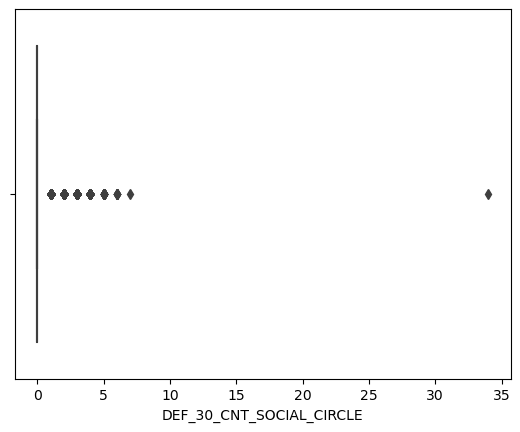

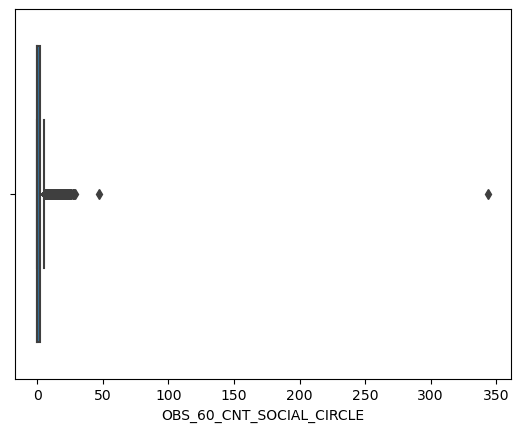

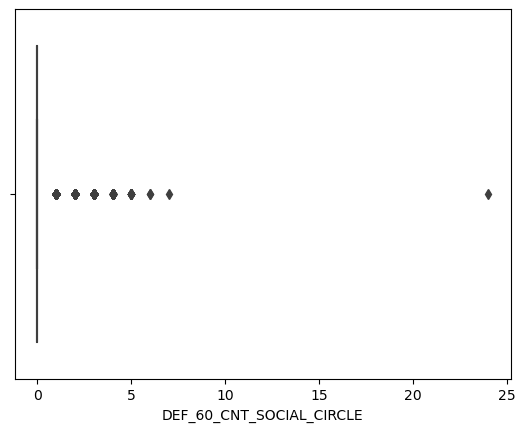

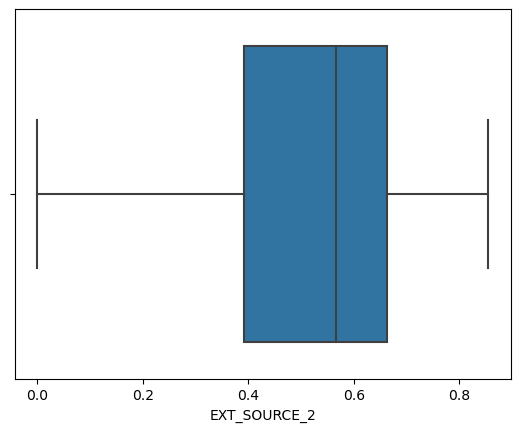

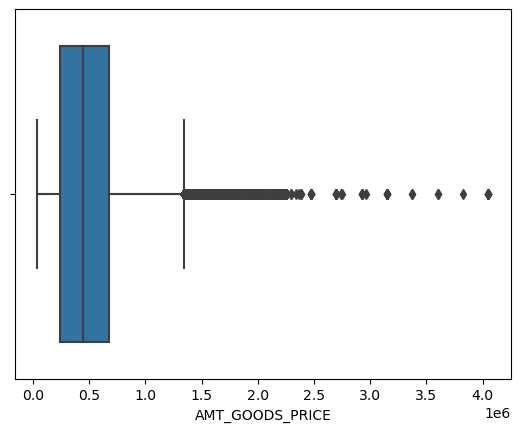

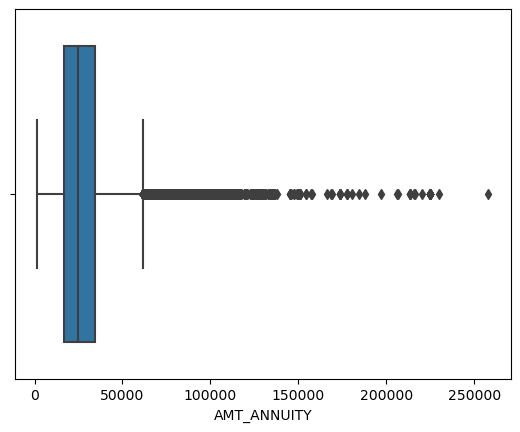

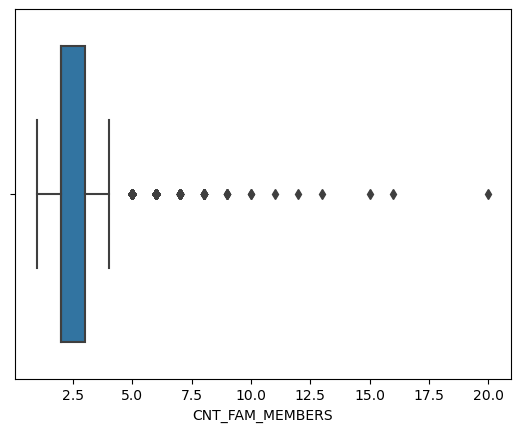

In [33]:
for i in float_missing_less_twty.index: 
    sns.boxplot(data=app_train, x=i, orient='h')
    plt.show()

# PART 2

In [34]:
float_missing_less_ptwo = float_missing_data[(float_missing_data['Percentage'] > 0.2) & (float_missing_data['Percentage'] < 0.6)]
float_missing_less_ptwo

,Count,Percentage
LANDAREA_AVG,127983,0.594559
LANDAREA_MODE,127983,0.594559
LANDAREA_MEDI,127983,0.594559
BASEMENTAREA_MEDI,125970,0.585207
BASEMENTAREA_AVG,125970,0.585207
BASEMENTAREA_MODE,125970,0.585207
EXT_SOURCE_1,121291,0.563471
NONLIVINGAREA_MEDI,118839,0.552080
NONLIVINGAREA_MODE,118839,0.552080
NONLIVINGAREA_AVG,118839,0.552080


In [35]:
app_train[float_missing_less_ptwo.index].describe()

,LANDAREA_AVG,LANDAREA_MODE,LANDAREA_MEDI,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,ELEVATORS_AVG,ELEVATORS_MODE,ELEVATORS_MEDI,APARTMENTS_MODE,APARTMENTS_AVG,APARTMENTS_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,LIVINGAREA_MODE,LIVINGAREA_MEDI,LIVINGAREA_AVG,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE
count,87274.000000,87274.000000,87274.000000,89287.000000,89287.000000,89287.000000,93966.000000,96418.000000,96418.000000,96418.000000,100519.000000,100519.000000,100519.000000,105926.000000,105926.000000,105926.000000,106859.000000,106859.000000,106859.000000,107258.000000,107258.000000,107258.000000,108121.000000,108121.000000,108121.000000,110260.000000,110260.000000,110260.000000,111365.000000
mean,0.066344,0.064911,0.067161,0.087800,0.088268,0.087375,0.501903,0.028352,0.027157,0.028476,0.078852,0.074398,0.077982,0.114266,0.117455,0.117870,0.145179,0.149722,0.149199,0.105804,0.108396,0.107219,0.226465,0.226086,0.222469,0.977067,0.977726,0.977745,0.102538
std,0.081526,0.081893,0.082396,0.081797,0.081932,0.084001,0.210950,0.070517,0.070641,0.069965,0.134267,0.131898,0.134100,0.107900,0.108100,0.108998,0.101275,0.100381,0.100708,0.111356,0.111685,0.110070,0.144578,0.145012,0.143678,0.064683,0.059495,0.060077,0.107465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018600,0.016500,0.018600,0.043700,0.044200,0.040600,0.333749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052500,0.057700,0.058300,0.069000,0.069000,0.069000,0.042700,0.045600,0.045200,0.166700,0.166700,0.166700,0.976700,0.976700,0.976700,0.041200
50%,0.048100,0.045700,0.048600,0.075700,0.076100,0.074500,0.505673,0.003000,0.001100,0.003500,0.000000,0.000000,0.000000,0.084000,0.087600,0.086900,0.137900,0.137900,0.137900,0.073100,0.074900,0.074500,0.166700,0.166700,0.166700,0.981600,0.981600,0.981600,0.068800
75%,0.085600,0.084000,0.086700,0.111500,0.112100,0.112300,0.674901,0.026700,0.023100,0.027700,0.120000,0.120800,0.120000,0.145000,0.148500,0.148900,0.206900,0.206900,0.206900,0.125300,0.130275,0.129800,0.333300,0.333300,0.333300,0.986600,0.986600,0.986600,0.127800
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.951624,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data visualization

c:\Users\Cesan\miniconda3\envs\santireds\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


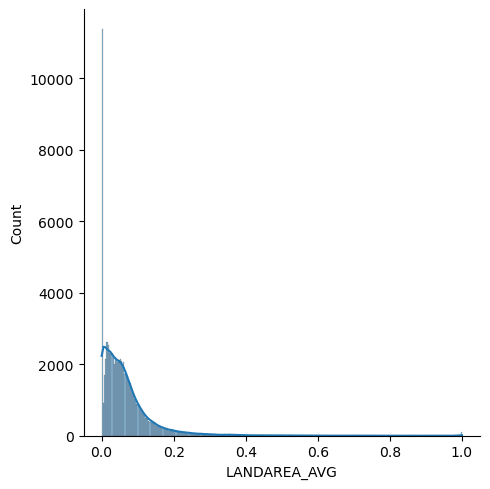

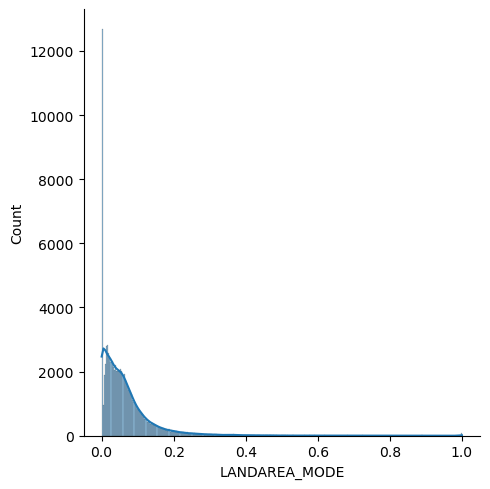

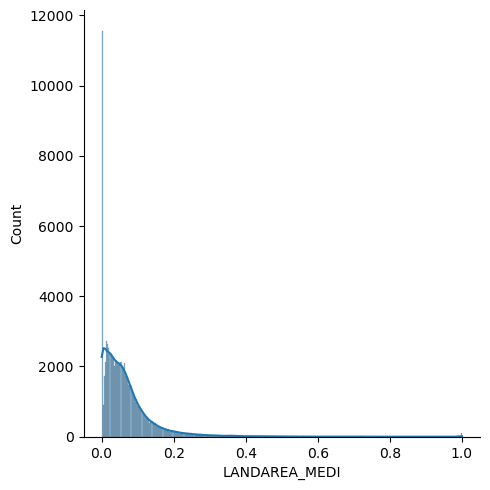

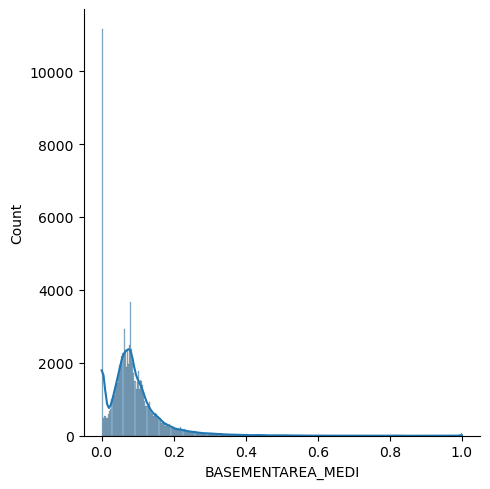

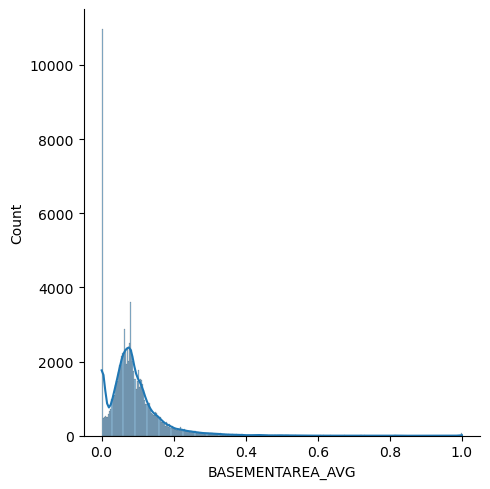

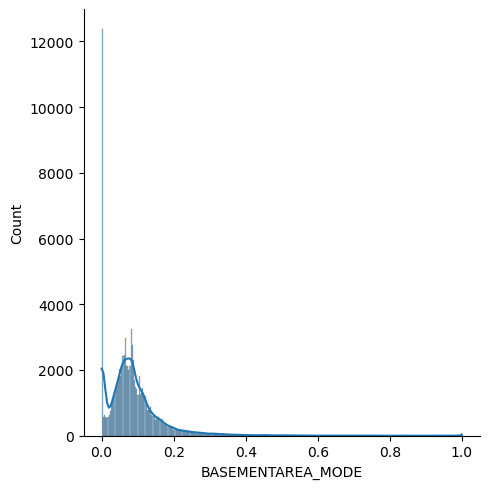

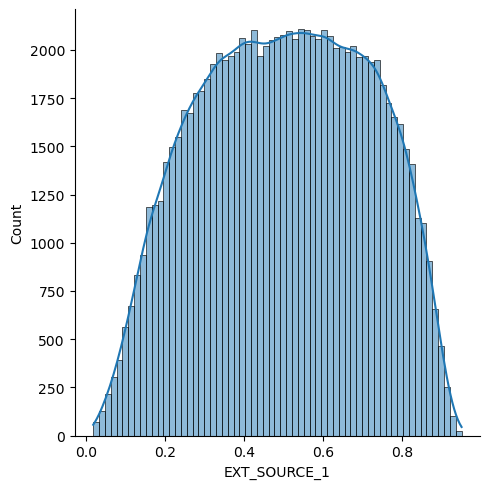

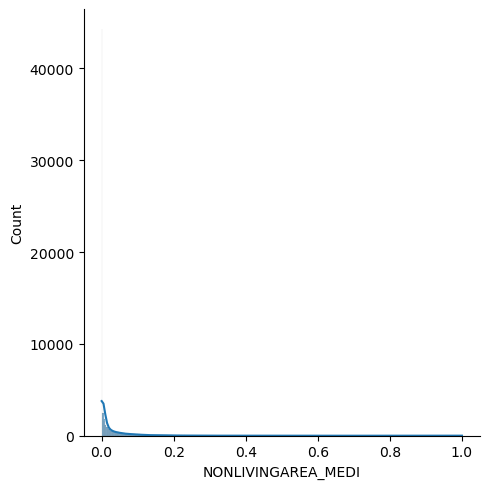

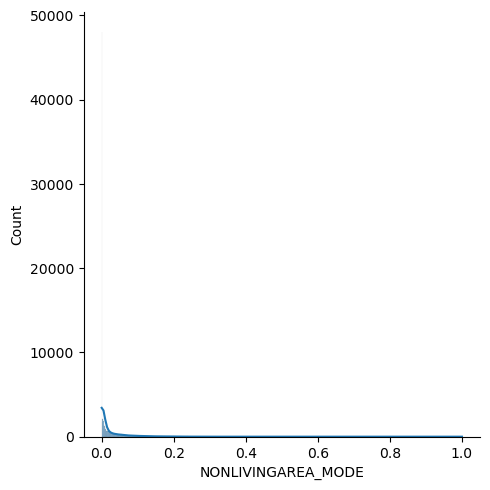

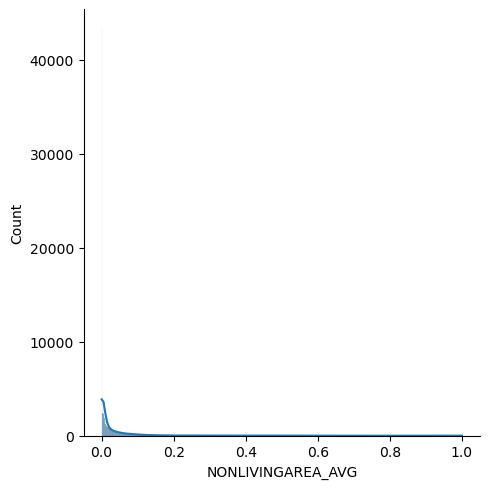

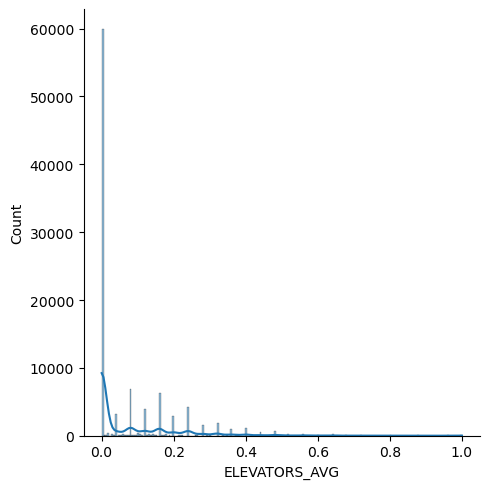

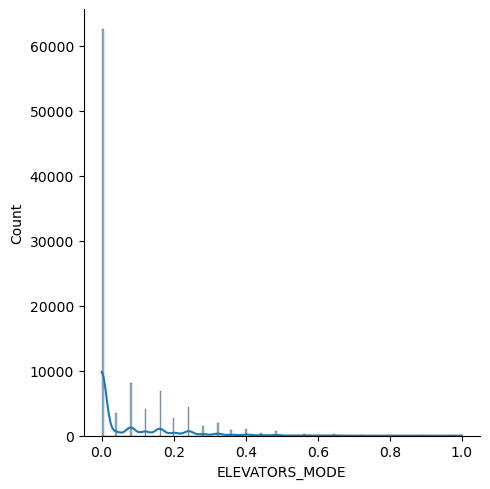

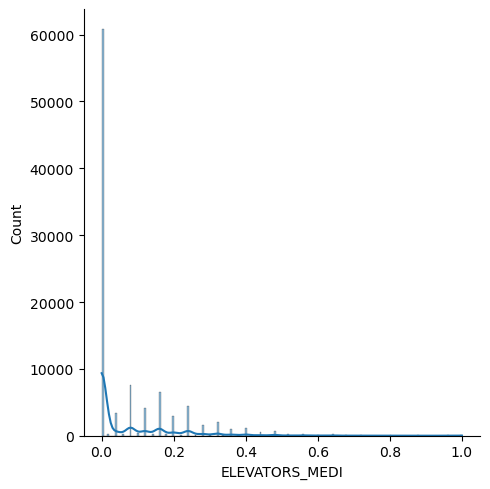

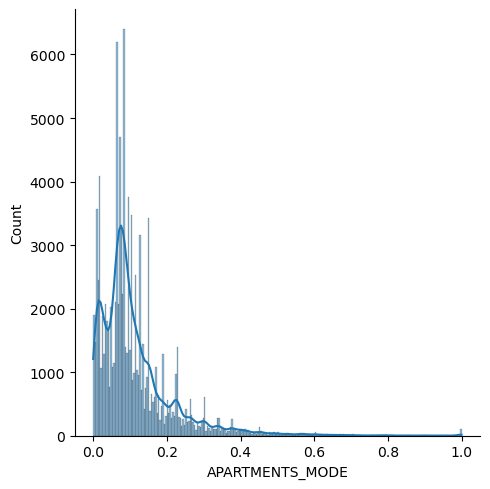

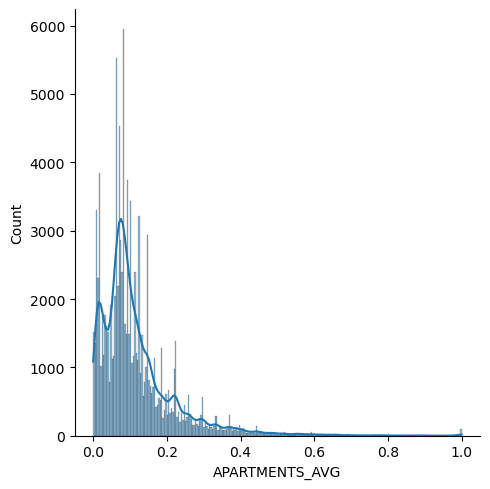

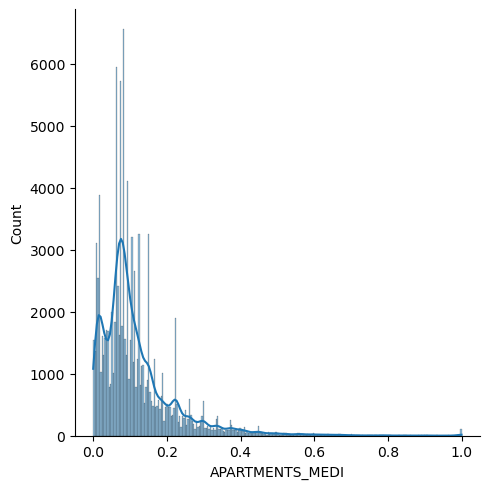

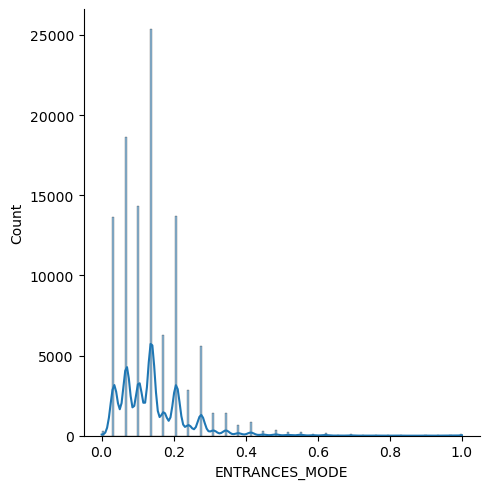

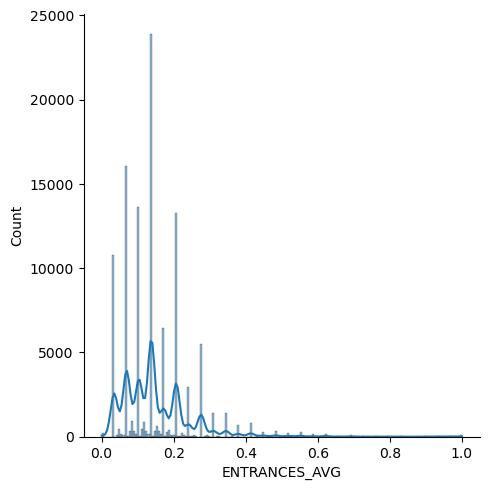

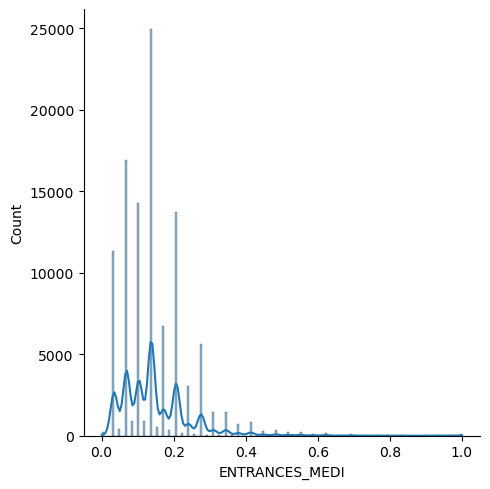

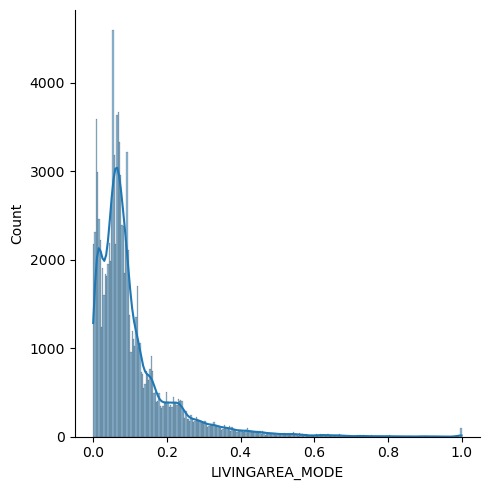

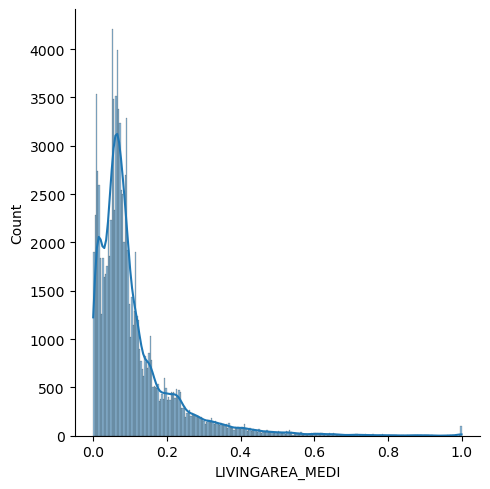

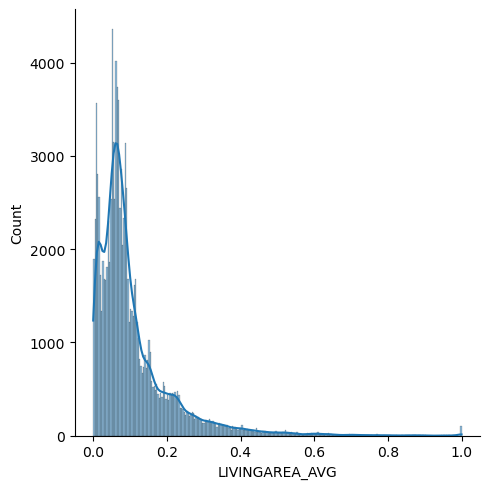

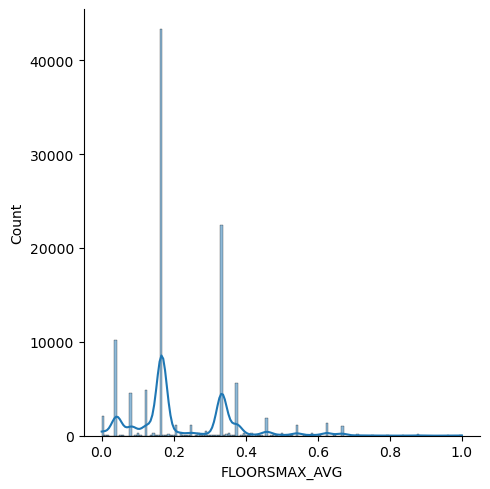

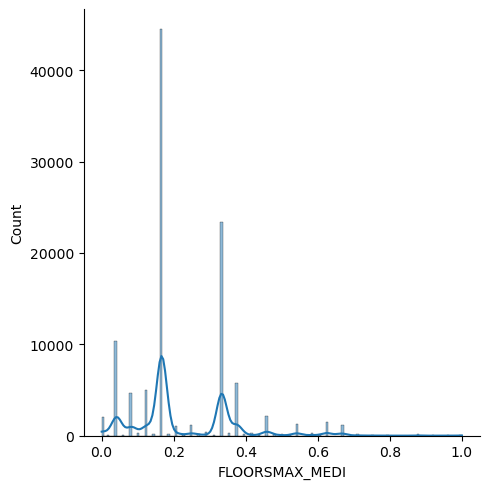

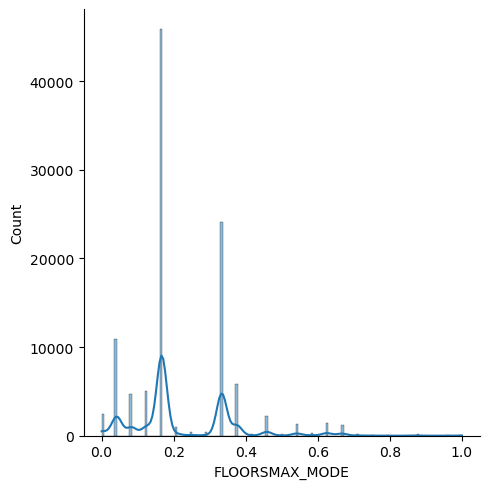

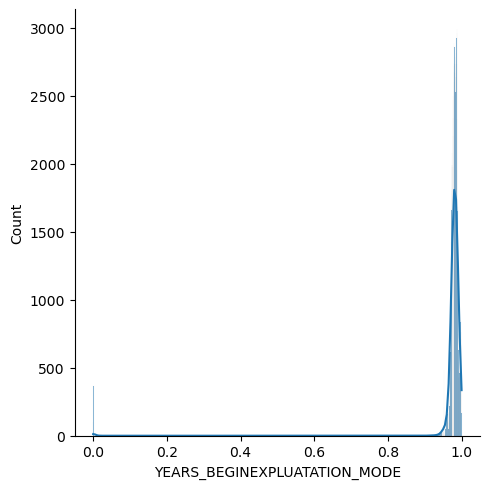

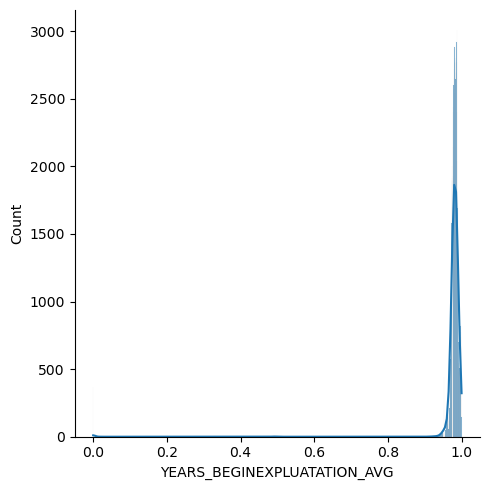

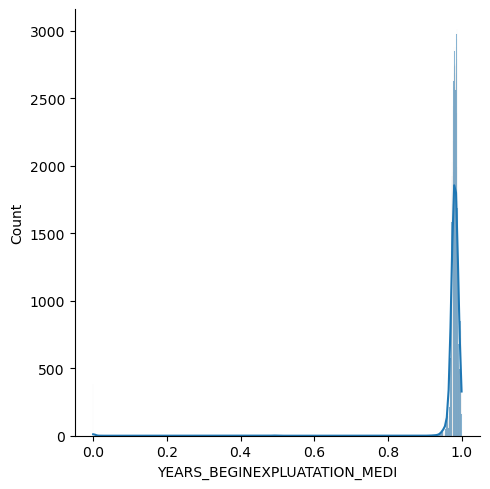

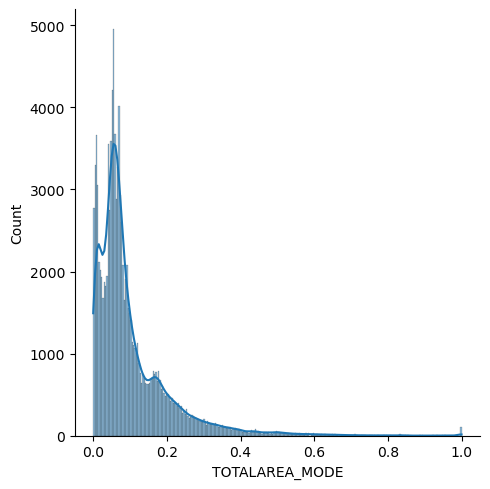

In [36]:
for i in float_missing_less_ptwo.index:
    sns.displot(x=i, data=app_train, kde=True)

#### Box Plot visualization

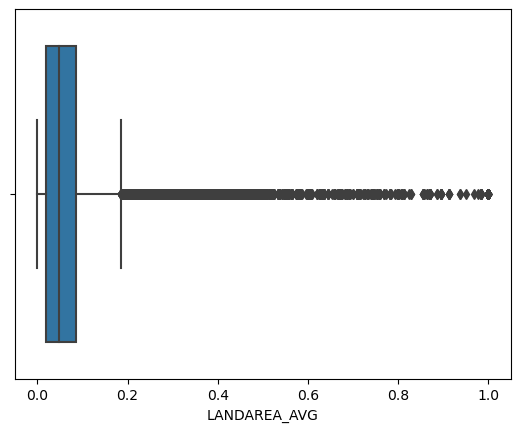

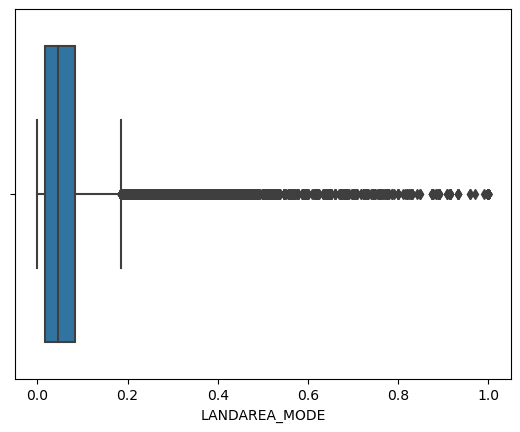

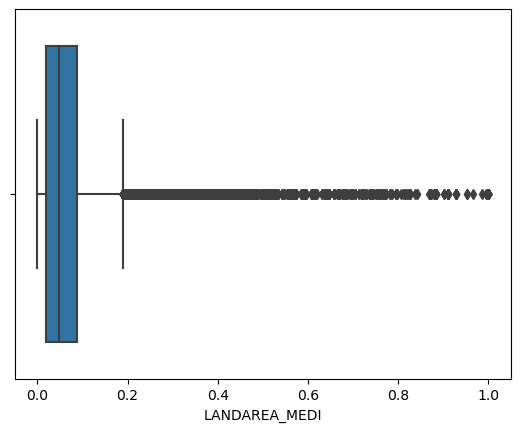

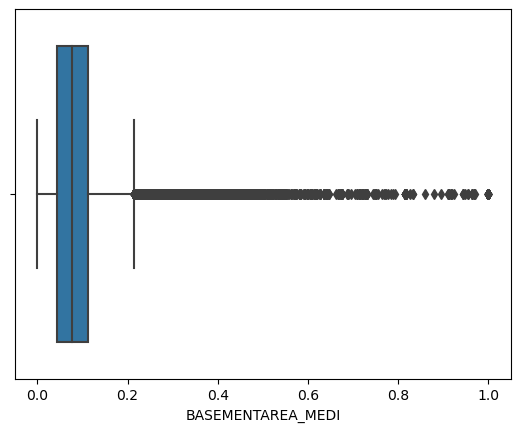

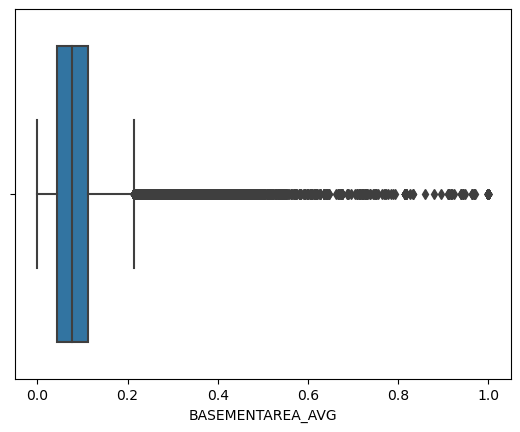

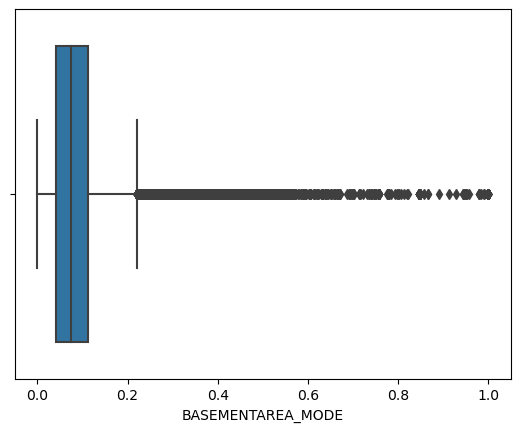

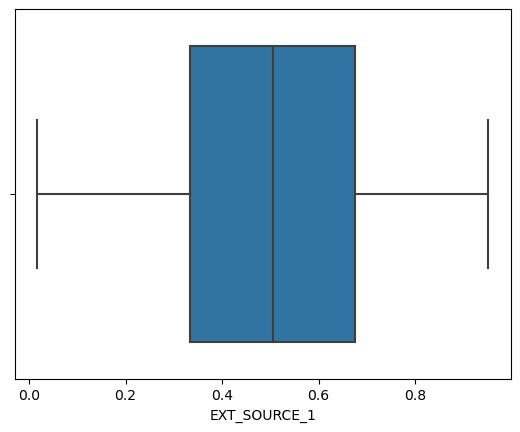

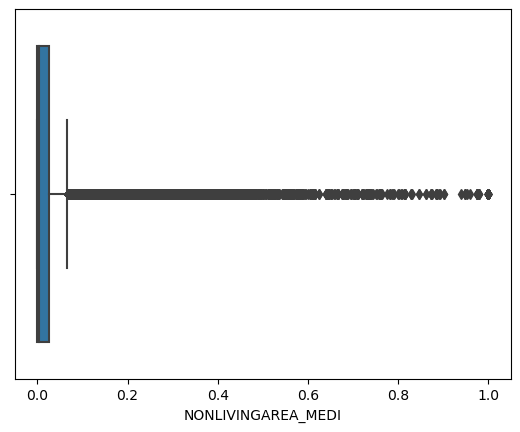

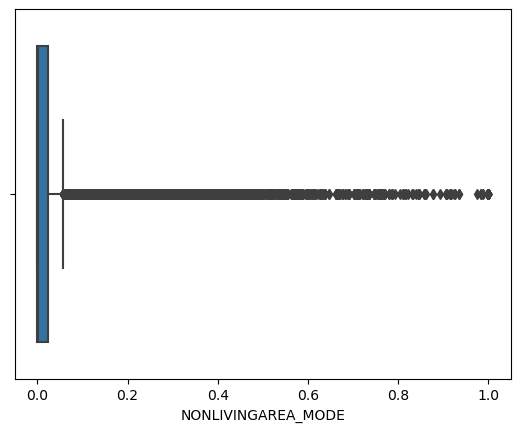

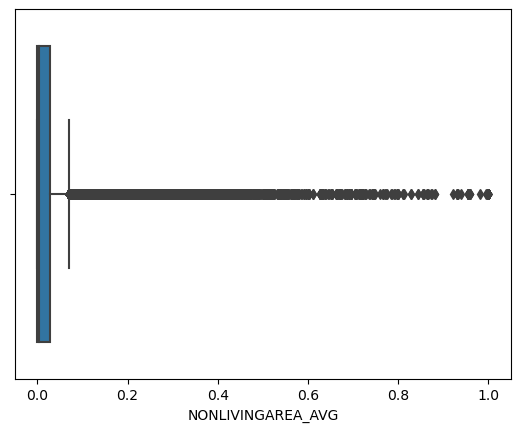

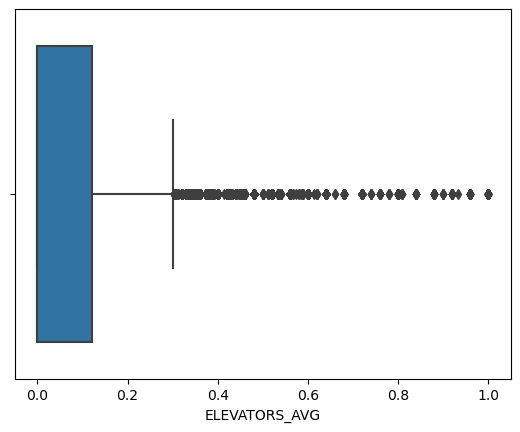

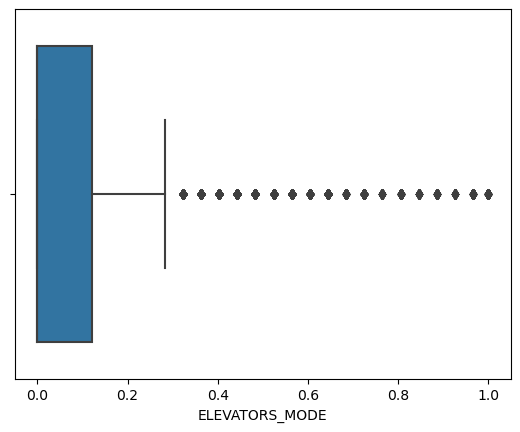

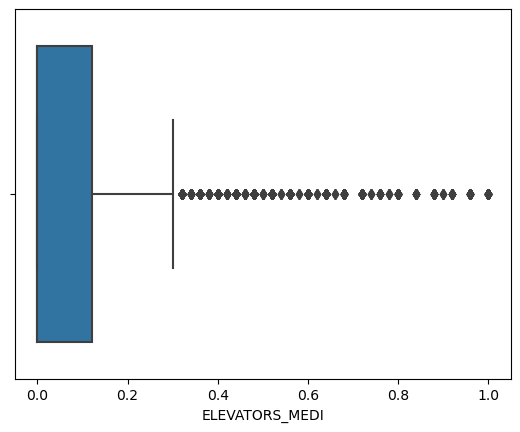

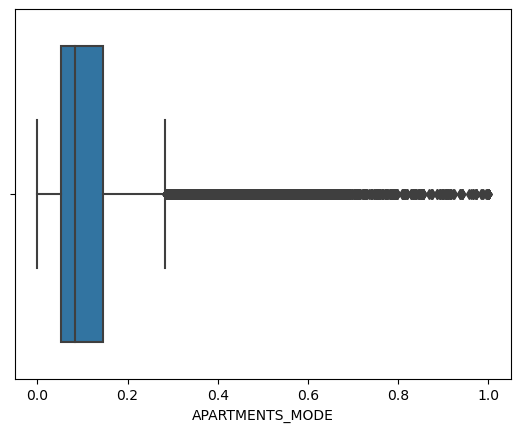

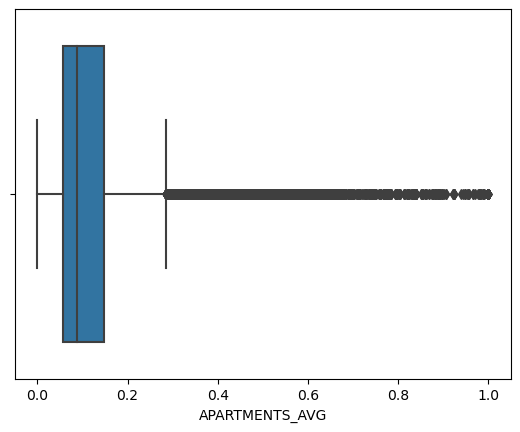

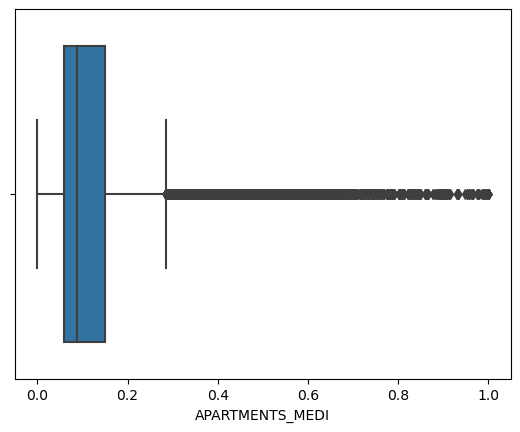

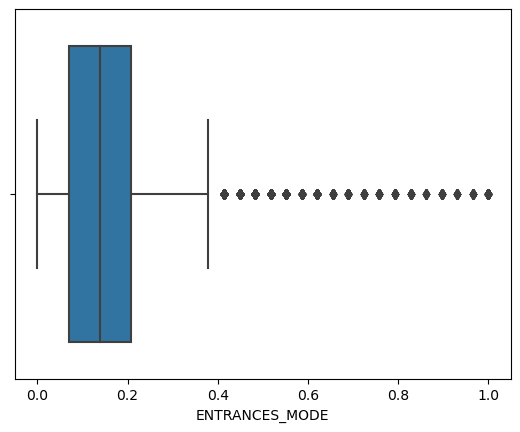

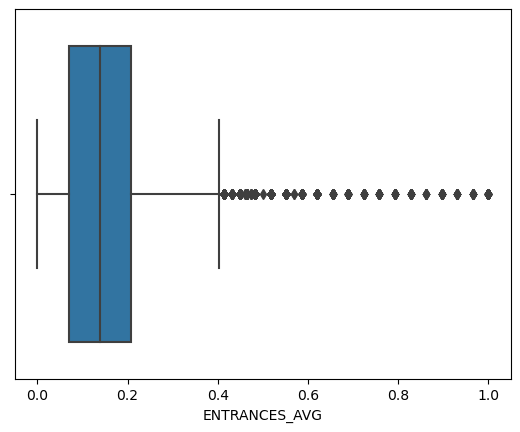

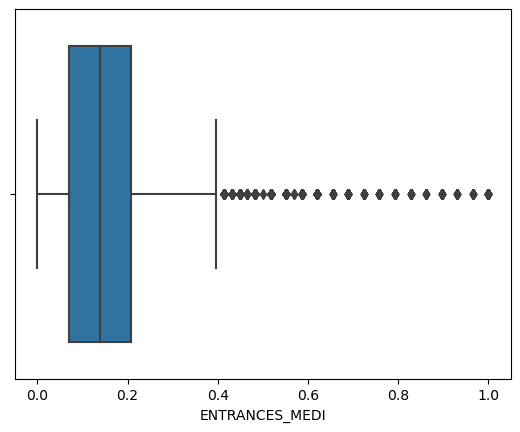

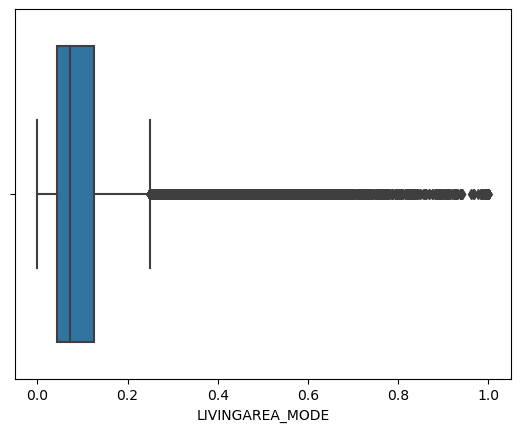

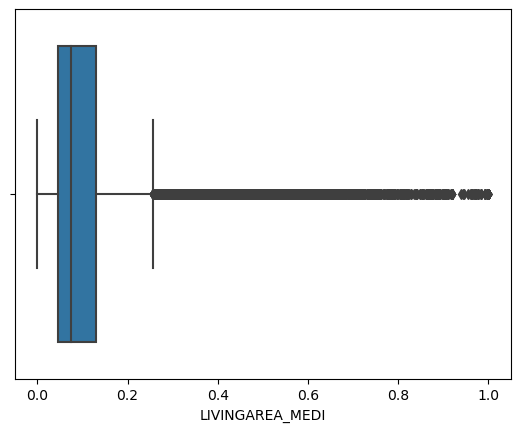

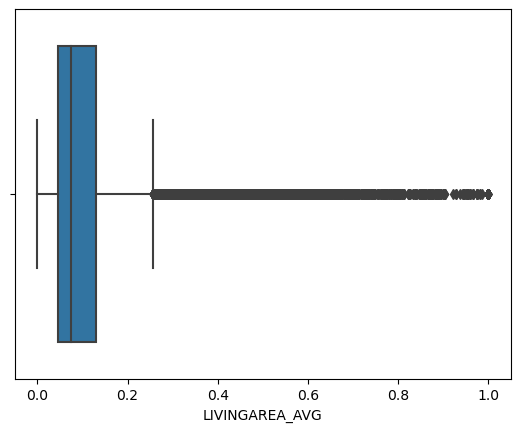

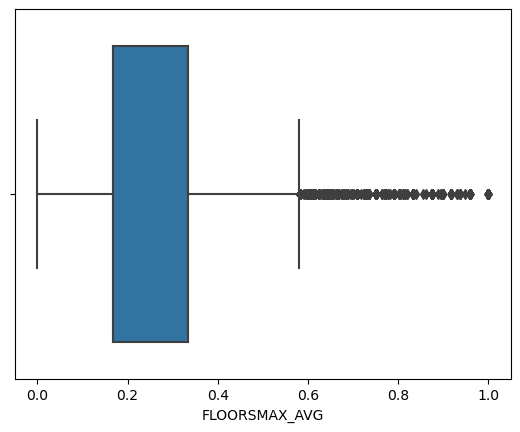

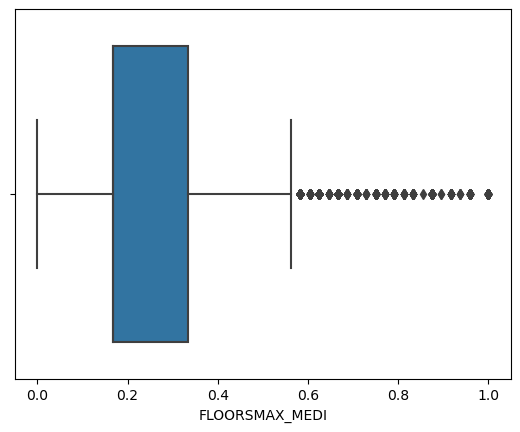

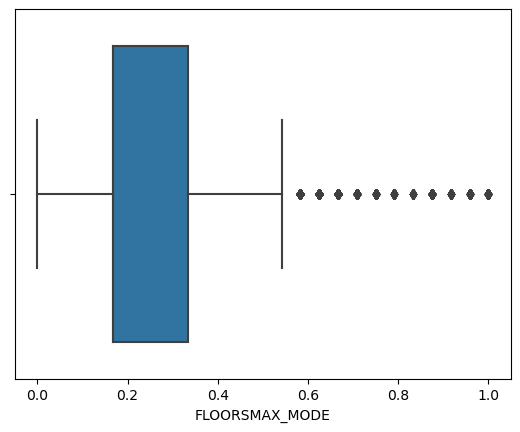

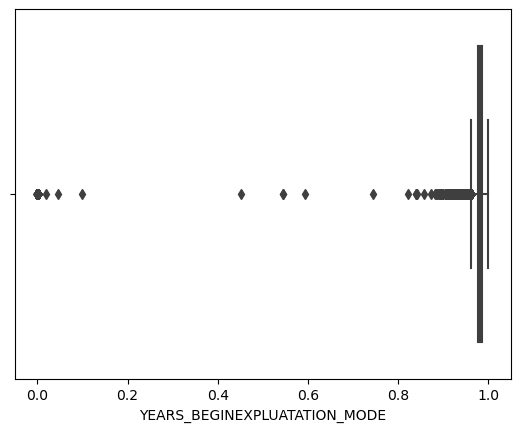

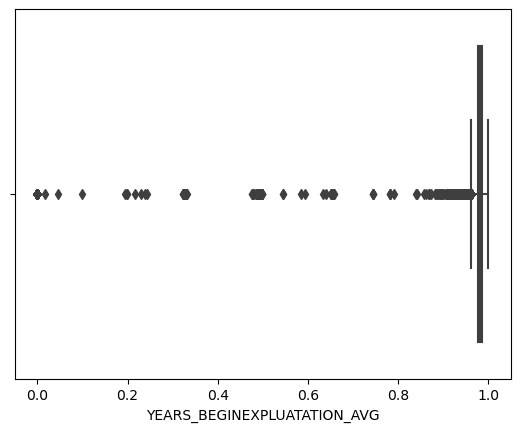

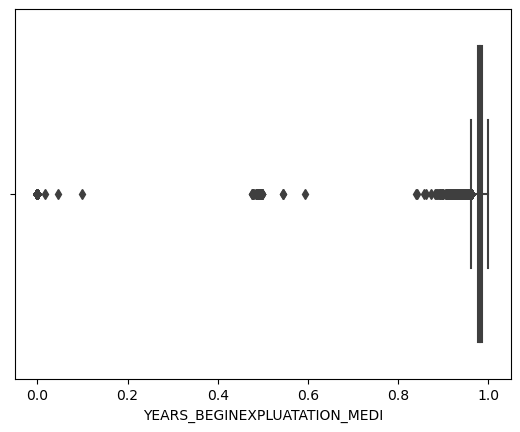

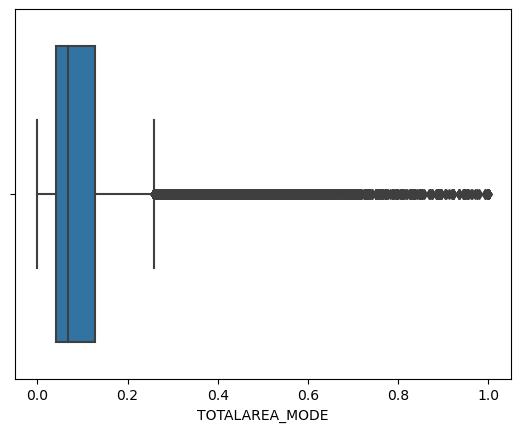

In [37]:
for i in float_missing_less_ptwo.index: 
    sns.boxplot(data=app_train, x=i, orient='h')
    plt.show()

# PART 3

In [38]:
float_missing_pthree = float_missing_data[float_missing_data['Percentage'] > 0.6]
float_missing_pthree

,Count,Percentage
COMMONAREA_MODE,150393,0.698667
COMMONAREA_MEDI,150393,0.698667
COMMONAREA_AVG,150393,0.698667
NONLIVINGAPARTMENTS_MODE,149483,0.694440
NONLIVINGAPARTMENTS_MEDI,149483,0.694440
NONLIVINGAPARTMENTS_AVG,149483,0.694440
LIVINGAPARTMENTS_MODE,147144,0.683574
LIVINGAPARTMENTS_MEDI,147144,0.683574
LIVINGAPARTMENTS_AVG,147144,0.683574
FLOORSMIN_MEDI,146070,0.678584


In [39]:
app_train[float_missing_pthree.index].describe()

,COMMONAREA_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FLOORSMIN_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,OWN_CAR_AGE
count,64864.000000,64864.000000,64864.000000,65774.000000,65774.000000,65774.000000,68113.000000,68113.000000,68113.000000,69187.000000,69187.000000,69187.000000,72108.000000,72108.000000,72108.000000,73240.000000
mean,0.042421,0.044447,0.044467,0.008189,0.008786,0.008931,0.105574,0.101898,0.100690,0.231834,0.232087,0.228235,0.752642,0.755911,0.759753,12.088913
std,0.073965,0.075712,0.075573,0.046317,0.047632,0.047886,0.097593,0.093392,0.092146,0.161813,0.161244,0.161024,0.113763,0.112529,0.110590,11.991361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007200,0.007900,0.007900,0.000000,0.000000,0.000000,0.054200,0.051300,0.050400,0.083300,0.083300,0.083300,0.687200,0.691400,0.699400,5.000000
50%,0.019000,0.020700,0.020900,0.000000,0.000000,0.000000,0.077100,0.076100,0.075600,0.208300,0.208300,0.208300,0.755200,0.758500,0.764800,9.000000
75%,0.048900,0.051200,0.051300,0.003900,0.003900,0.003900,0.131300,0.123100,0.121000,0.375000,0.375000,0.375000,0.823200,0.825600,0.823600,15.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000


#### Data Visualization

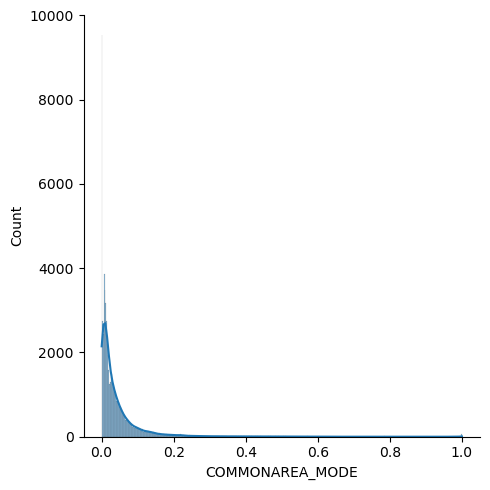

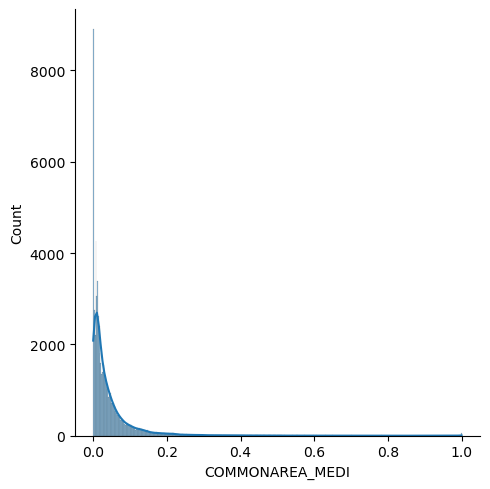

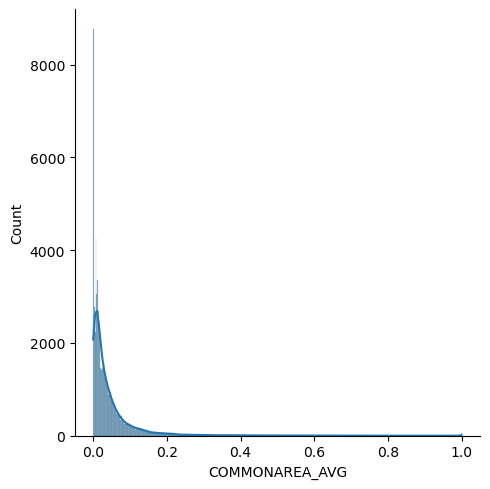

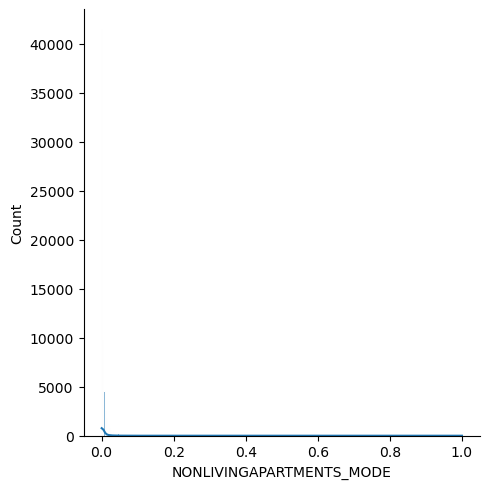

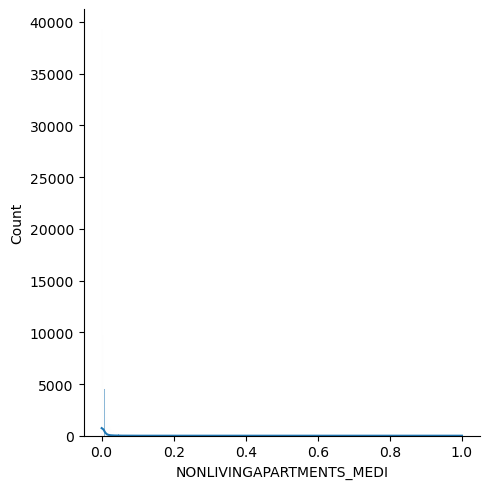

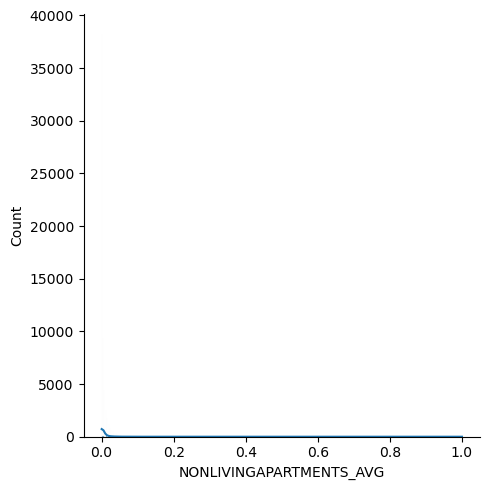

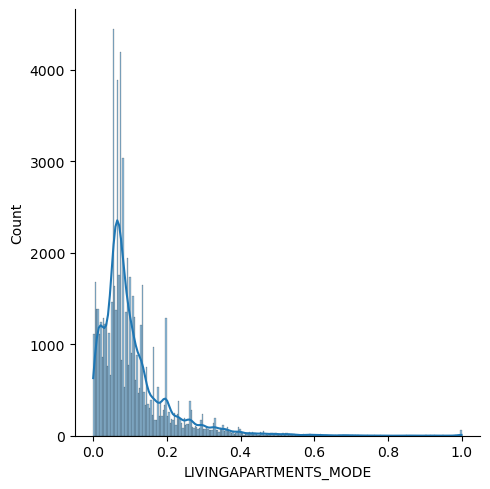

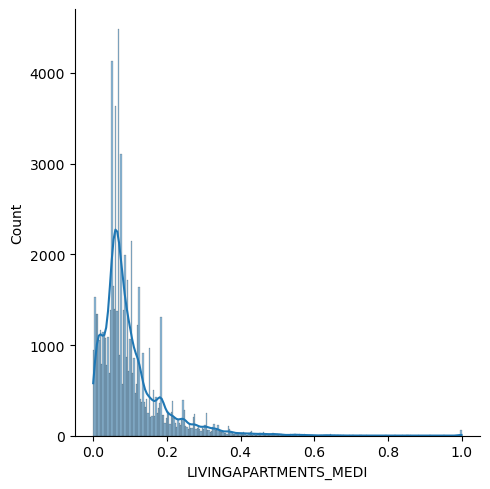

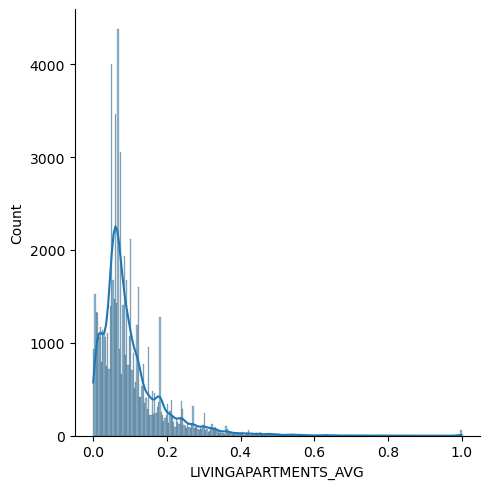

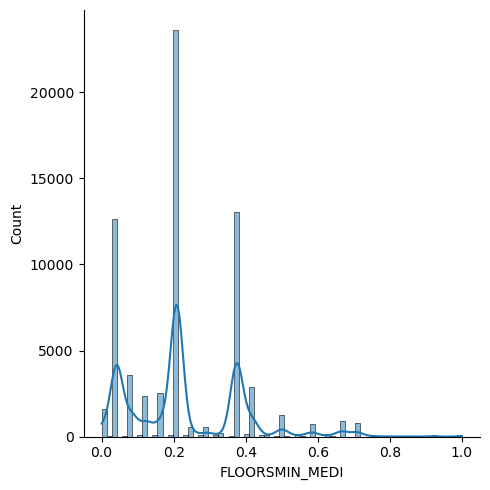

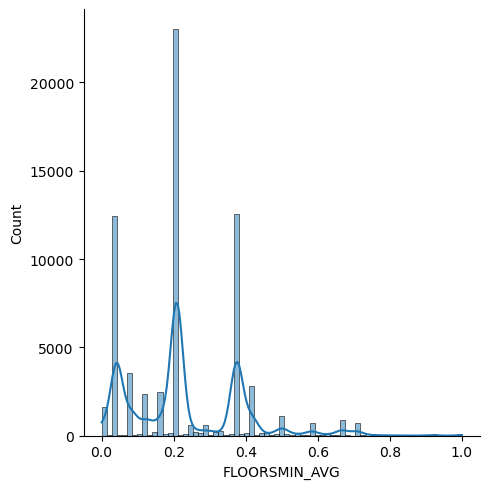

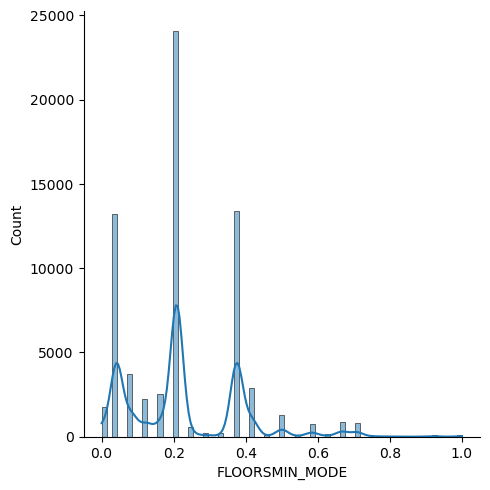

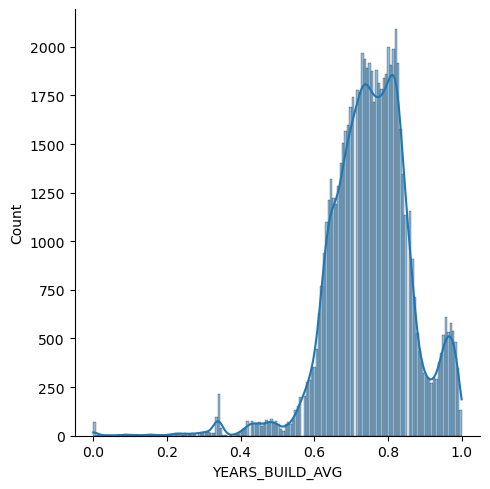

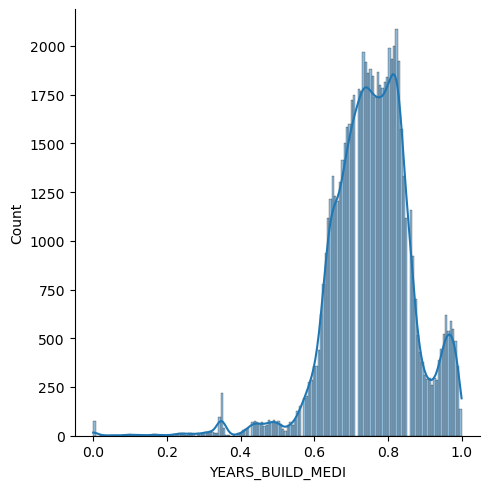

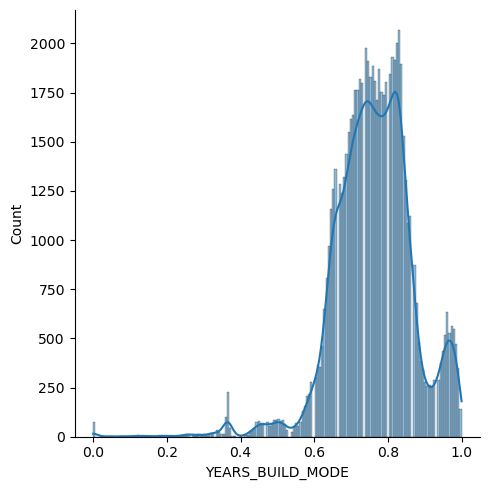

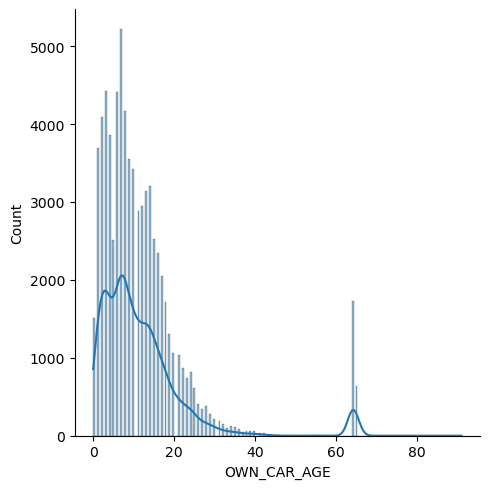

In [40]:
for i in float_missing_pthree.index:
    sns.displot(x=i, data=app_train, kde=True)

#### Box Plot visualization

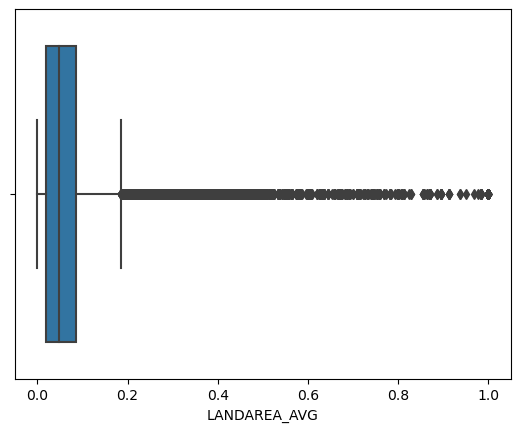

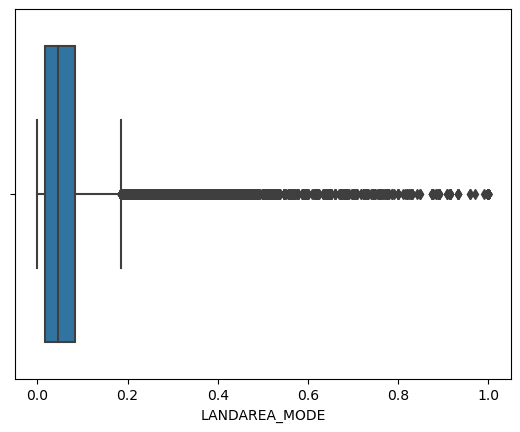

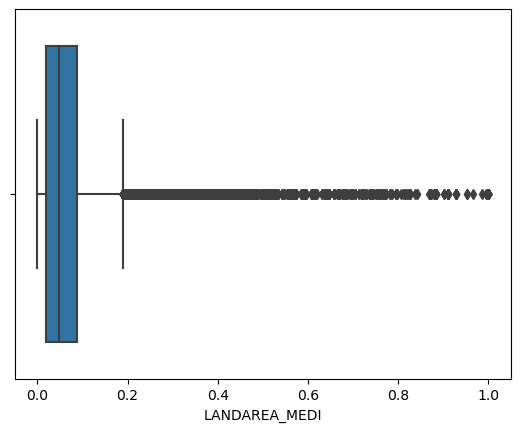

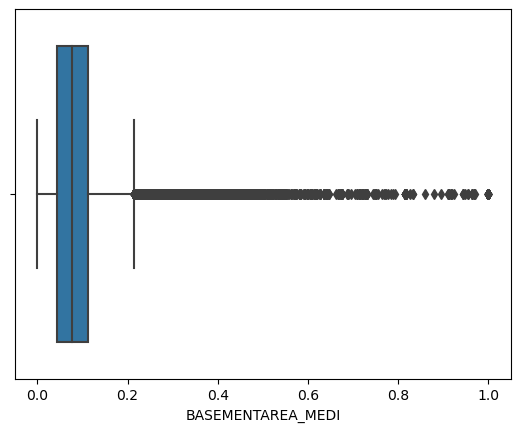

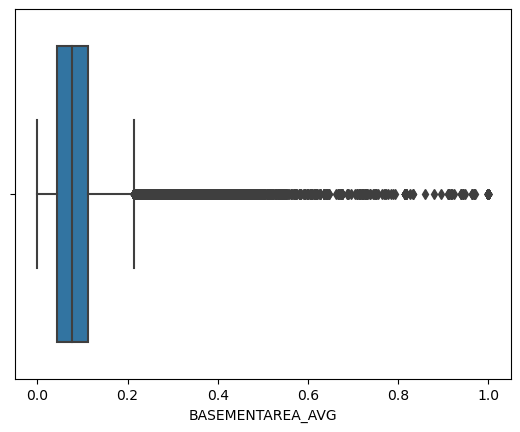

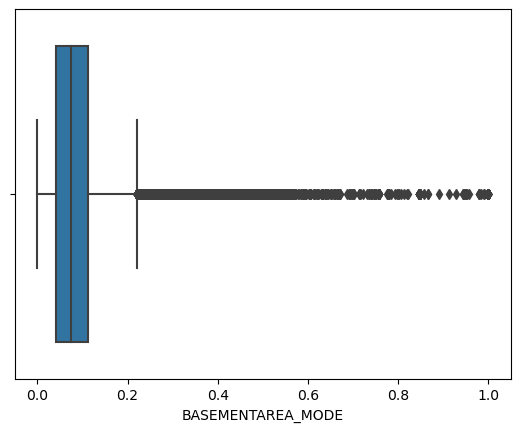

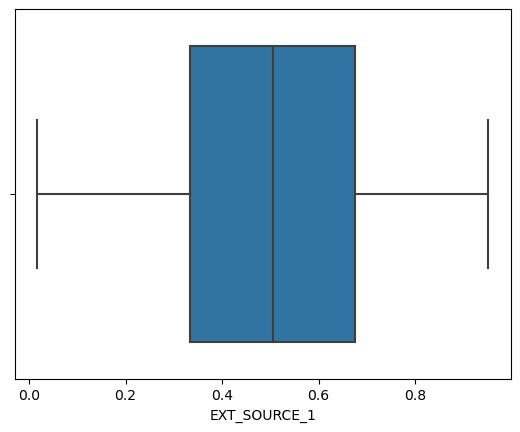

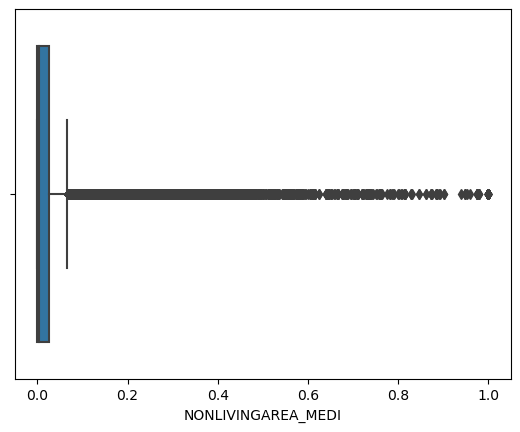

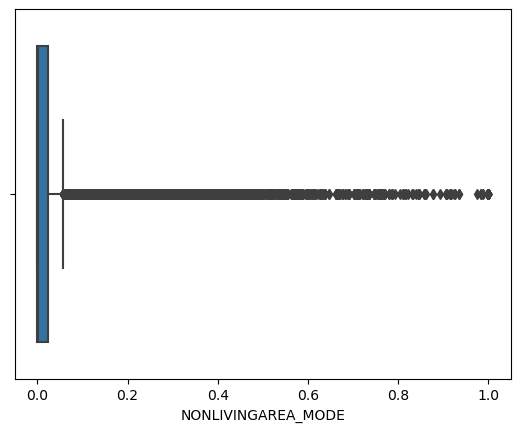

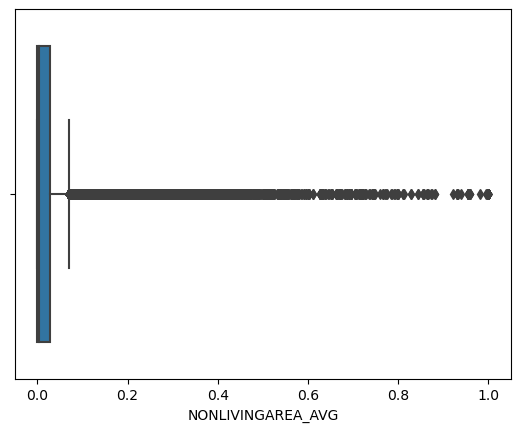

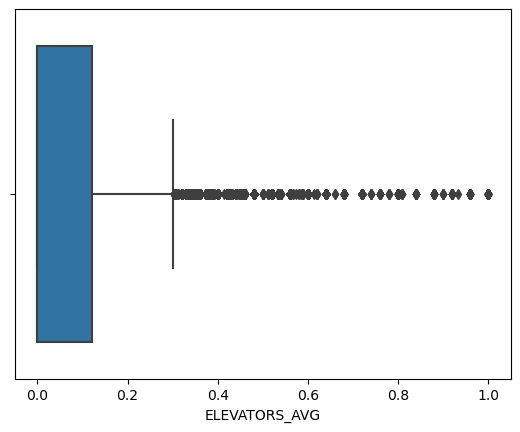

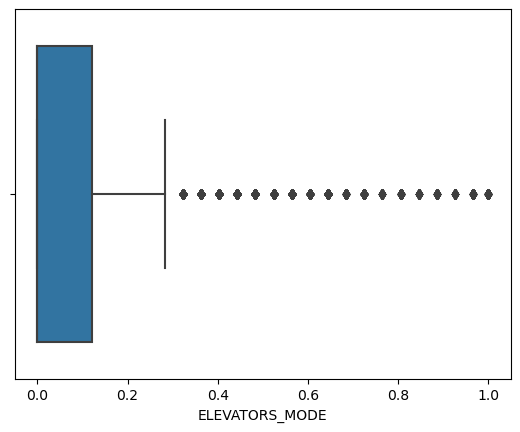

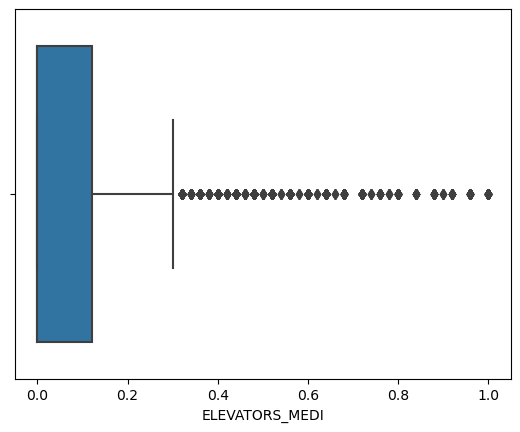

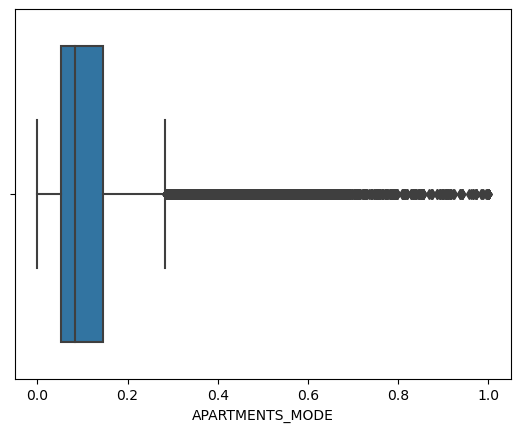

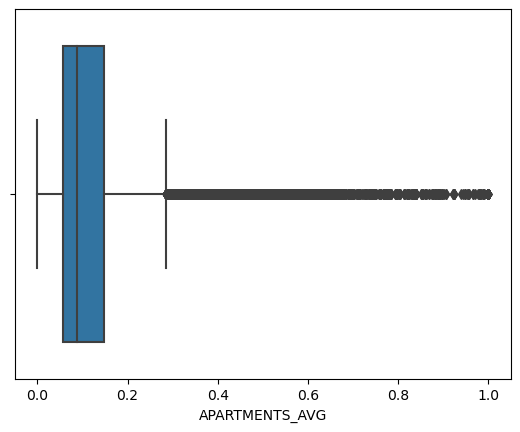

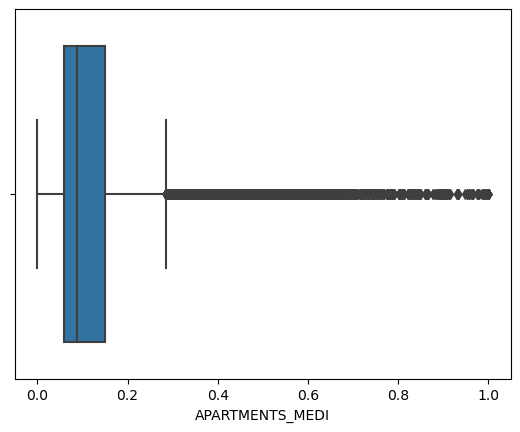

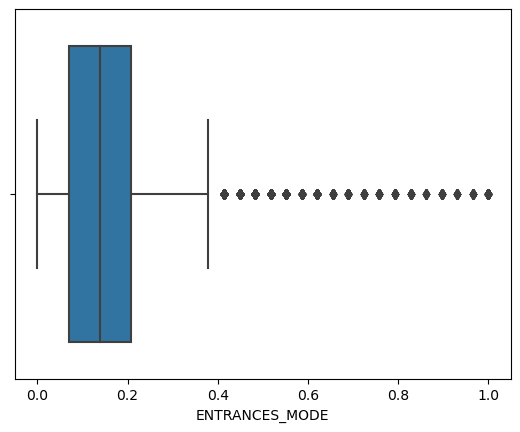

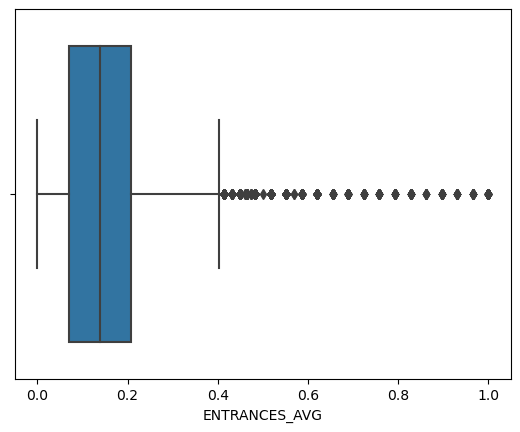

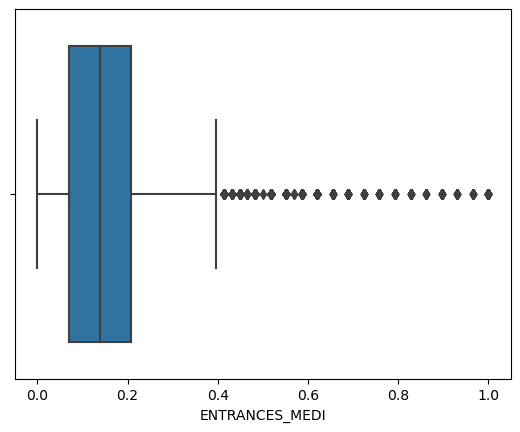

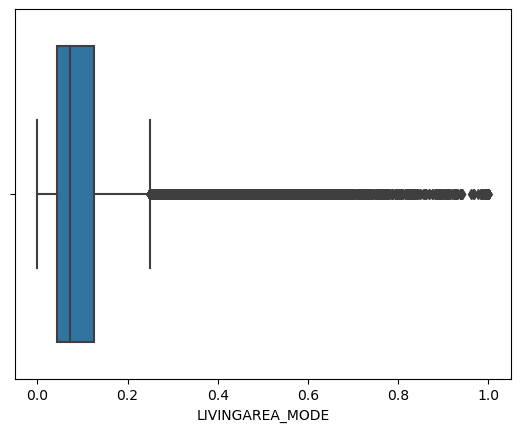

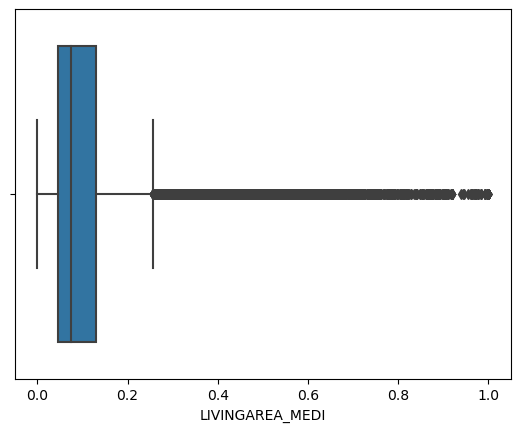

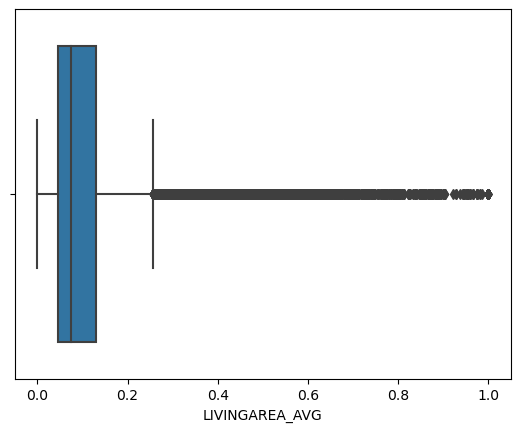

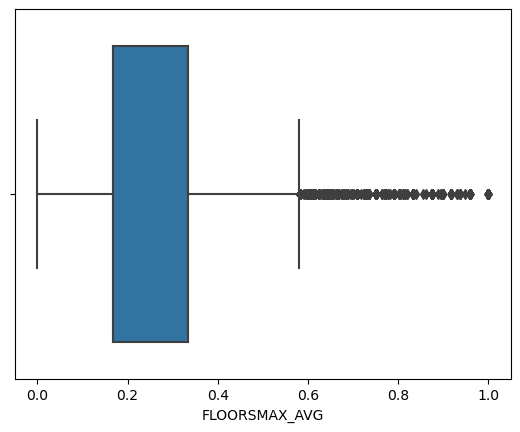

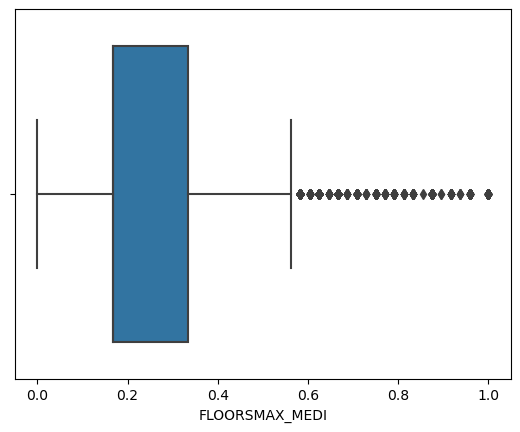

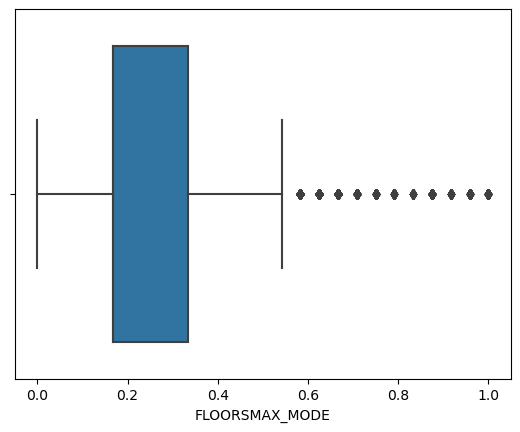

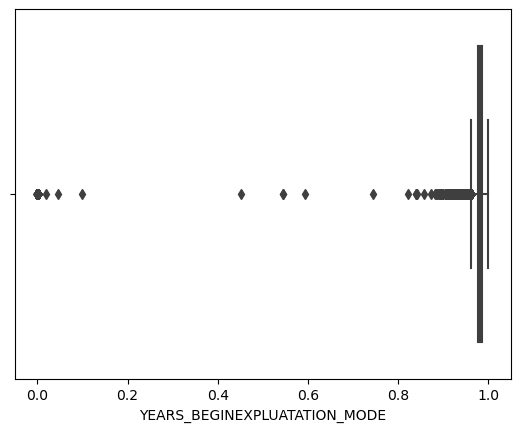

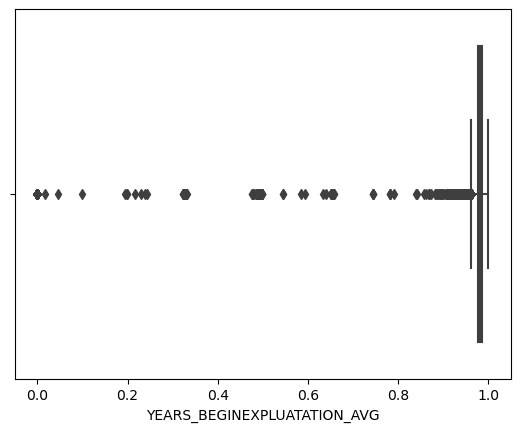

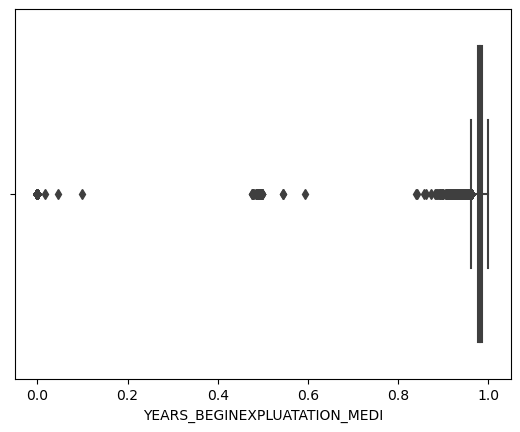

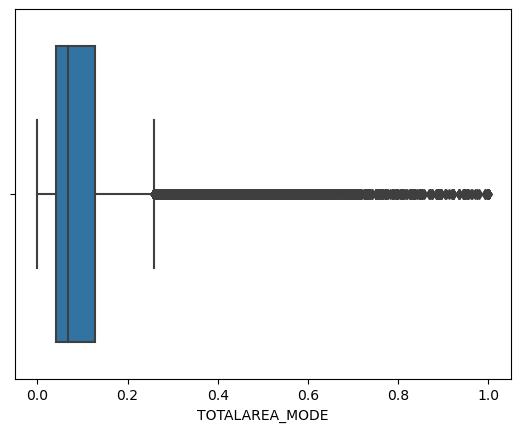

In [41]:
for i in float_missing_less_ptwo.index: 
    sns.boxplot(data=app_train, x=i, orient='h')
    plt.show()

## Categorical Data Analysis

In [42]:
# Subsuet of categorical columns 
cat_columns_data = app_train.select_dtypes(include='object')
cat_columns_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Core staff,WEDNESDAY,School,reg oper account,block of flats,Panel,No
1,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Laborers,SATURDAY,Industry: type 11,NaN,NaN,NaN,NaN
2,Cash loans,F,N,Y,Family,Working,Secondary / secondary special,Single / not married,House / apartment,High skill tech staff,FRIDAY,Transport: type 4,reg oper account,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Accountants,WEDNESDAY,Self-employed,NaN,NaN,NaN,NaN
4,Cash loans,F,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Laborers,THURSDAY,Kindergarten,NaN,NaN,NaN,NaN


In [43]:
cat_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215257 entries, 0 to 215256
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          215257 non-null  object
 1   CODE_GENDER                 215257 non-null  object
 2   FLAG_OWN_CAR                215257 non-null  object
 3   FLAG_OWN_REALTY             215257 non-null  object
 4   NAME_TYPE_SUITE             214362 non-null  object
 5   NAME_INCOME_TYPE            215257 non-null  object
 6   NAME_EDUCATION_TYPE         215257 non-null  object
 7   NAME_FAMILY_STATUS          215257 non-null  object
 8   NAME_HOUSING_TYPE           215257 non-null  object
 9   OCCUPATION_TYPE             147792 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  215257 non-null  object
 11  ORGANIZATION_TYPE           215257 non-null  object
 12  FONDKAPREMONT_MODE          68040 non-null   object
 13  HOUSETYPE_MODE              1

In [44]:
nunique_cat = obj_columns.nunique().sort_values(ascending=False)
nunique_cat

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

In [45]:
categorical_missing_data = cat_columns_data.isnull().sum().sort_values(ascending=False)
categorical_missing_data

FONDKAPREMONT_MODE            147217
WALLSMATERIAL_MODE            109407
HOUSETYPE_MODE                108032
EMERGENCYSTATE_MODE           101991
OCCUPATION_TYPE                67465
NAME_TYPE_SUITE                  895
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
dtype: int64

In [46]:
categorical_missing_data = pd.DataFrame(categorical_missing_data, columns=['Count'])
categorical_missing_data['Percentage'] = categorical_missing_data['Count'] / app_train.shape[0]
categorical_missing_data

,Count,Percentage
FONDKAPREMONT_MODE,147217,0.683913
WALLSMATERIAL_MODE,109407,0.508262
HOUSETYPE_MODE,108032,0.501875
EMERGENCYSTATE_MODE,101991,0.473810
OCCUPATION_TYPE,67465,0.313416
NAME_TYPE_SUITE,895,0.004158
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000


In [47]:
cat_mis_dat = cat_columns_data.isnull().sum().sort_values(ascending=False)
cat_mis_dat = pd.DataFrame(cat_mis_dat, columns=['count'])
nunique_cat = pd.DataFrame(nunique_cat, columns=['unique_cat'])
cat_mis_dat_uni = cat_mis_dat.join(nunique_cat)
cat_mis_dat_uni

,count,unique_cat
FONDKAPREMONT_MODE,147217,4
WALLSMATERIAL_MODE,109407,7
HOUSETYPE_MODE,108032,3
EMERGENCYSTATE_MODE,101991,2
OCCUPATION_TYPE,67465,18
NAME_TYPE_SUITE,895,7
NAME_CONTRACT_TYPE,0,2
CODE_GENDER,0,3
FLAG_OWN_CAR,0,2
FLAG_OWN_REALTY,0,2


In [48]:
categorical_missing_data = categorical_missing_data[categorical_missing_data['Count'] != 0]
categorical_missing_data

,Count,Percentage
FONDKAPREMONT_MODE,147217,0.683913
WALLSMATERIAL_MODE,109407,0.508262
HOUSETYPE_MODE,108032,0.501875
EMERGENCYSTATE_MODE,101991,0.473810
OCCUPATION_TYPE,67465,0.313416
NAME_TYPE_SUITE,895,0.004158


In [49]:
app_train[categorical_missing_data.index].nunique().sort_values(ascending=False)

OCCUPATION_TYPE        18
WALLSMATERIAL_MODE      7
NAME_TYPE_SUITE         7
FONDKAPREMONT_MODE      4
HOUSETYPE_MODE          3
EMERGENCYSTATE_MODE     2
dtype: int64

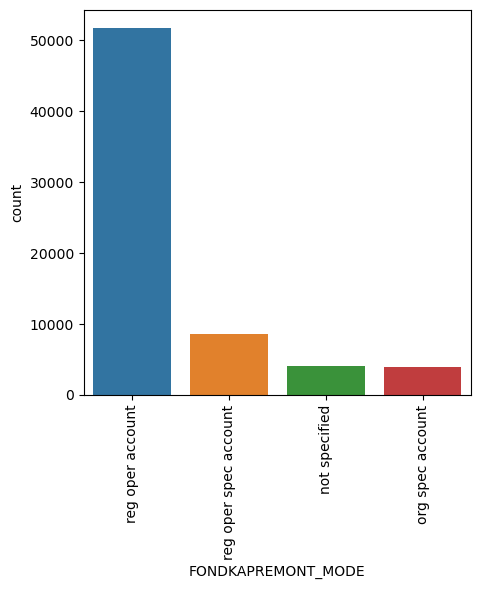

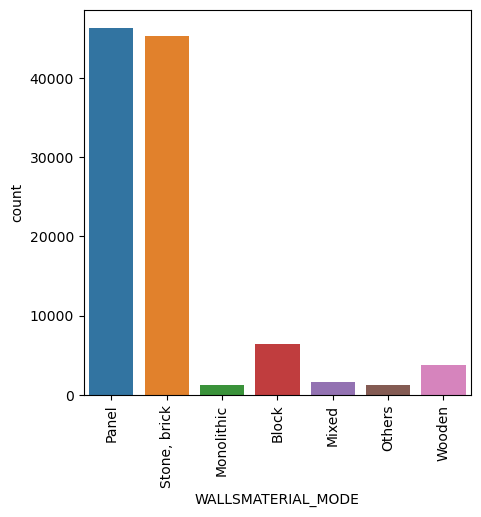

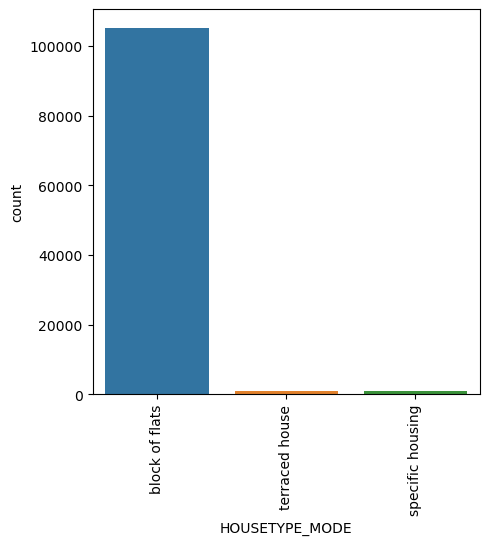

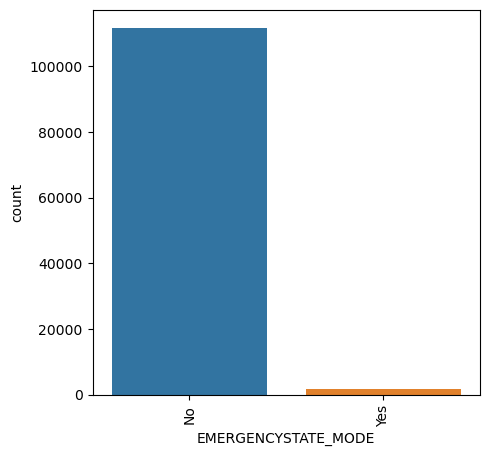

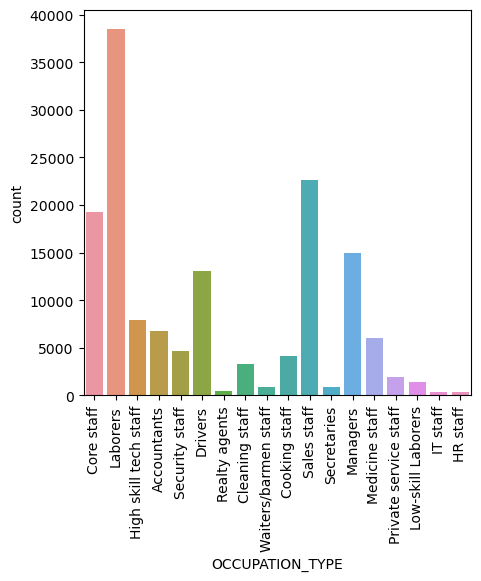

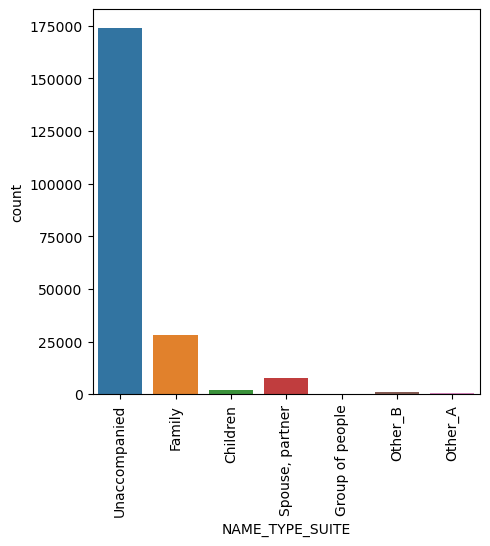

In [50]:
for i in app_train[categorical_missing_data.index].columns:
    plt.figure(figsize=(5,5))
    plt.xticks(rotation=90)
    sns.countplot(data=app_train, x=i)
    plt.show()

### We decided to drop the column "FONDKAPREMONT_MODE".

# Dealing with columns DAYS_EMPLOYED

In [51]:
app_train['DAYS_EMPLOYED'].describe()

count    215257.000000
mean      63781.659212
std      141252.251323
min      -17583.000000
25%       -2766.000000
50%       -1215.000000
75%        -291.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

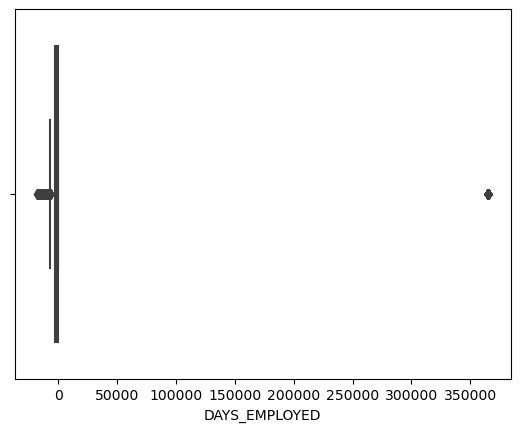

In [52]:
sns.boxplot(data=app_train, x='DAYS_EMPLOYED')

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

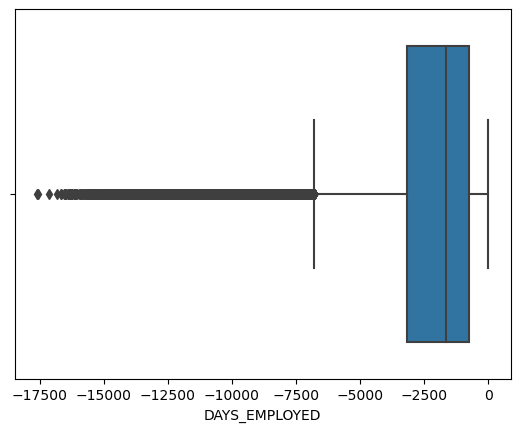

In [53]:
days_empl = app_train[app_train['DAYS_EMPLOYED'] != 365243]
sns.boxplot(data=days_empl, x='DAYS_EMPLOYED')

In [54]:
# Check the quantity of rows that have the value 365243
max_days_empl = app_train[app_train['DAYS_EMPLOYED'] == app_train['DAYS_EMPLOYED'].max()]
max_days_empl['DAYS_EMPLOYED'].count()

38744

In [55]:
days_empl['DAYS_EMPLOYED'].describe()

count    176513.000000
mean      -2388.074391
std        2339.785804
min      -17583.000000
25%       -3180.000000
50%       -1650.000000
75%        -769.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [56]:
proof_23 = app_train['DAYS_EMPLOYED'].where(app_train['DAYS_EMPLOYED'] < 0, 0)

In [57]:
proof_23.head()

0    -377
1   -7128
2   -4968
3   -2275
4   -8925
Name: DAYS_EMPLOYED, dtype: int64

2.1. The first step will be separate our train and test datasets columns between Features and Targets.

- Assign to `X_train` those columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).


In [58]:
### Complete in this cell
X_train = app_train.drop(['TARGET'], axis=1).copy()
y_train = app_train['TARGET']
X_test  = app_test.drop(['TARGET'], axis=1).copy()
y_test  = app_test['TARGET']


**Don't change anything in this cell, just make it run correctly**

In [59]:
if X_train.shape == (215257, 122):
  print('Success: X_train shape is correct!')
else:
  raise ValueError('X_train dataset shape is incorrect, please review your code')

if isinstance(X_train, pd.DataFrame):
  print('Success: X_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if y_train.shape == (215257,) or y_train.shape == (215257, 1):
  print('Success: y_train shape is correct!')
else:
  raise ValueError('Train labels shape is incorrect, please review your code')

if X_test.shape == (92254, 122):
  print('Success: X_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(X_test, pd.DataFrame):
  print('Success: X_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

if y_test.shape == (92254,) or y_test.shape == (92254, 1):
  print('Success: y_test shape is correct!')
else:
  raise ValueError('Test labels shape is incorrect, please review your code')


Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.2. In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

**Important note:** Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns. Check `pandas.DataFrame.align()` function.

Complete the function `preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame)` following the instructions given above.

In [60]:
### Complete in this cell: Data pre processing function
def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame):
  """
  Pre processes data for modeling. Receives train and testing dataframes 
  for Home Credit Competition, and returns numpy ndarrays of cleaned up 
  dataframes with feature engineering already performed.
  
  Arguments:
      train_df: pd.DataFrame
      test_df: pd.DataFrame
      
  Returns:
      train_data: np.ndarrary
      test_data: np.ndarrary
  """
  # Complete this function

# Drop outliers in column DAYS_EMPLOYED
  train_df['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].where(app_train['DAYS_EMPLOYED'] < 0, 0)
  test_df['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].where(app_train['DAYS_EMPLOYED'] < 0, 0)
  
# Impute numercial missing vlaues by the median
  train_impute_columns = pd.DataFrame(train_df.isnull().sum(), columns=['count'])
  train_impute_columns = train_impute_columns[train_impute_columns['count'] > 0 ]
  test_impute_columns = pd.DataFrame(test_df.isnull().sum(), columns=['count'])
  test_impute_columns = test_impute_columns[test_impute_columns['count'] > 0 ]

  train_df[train_impute_columns.index] = train_df[train_impute_columns.index].fillna(train_df[train_impute_columns.index].median())
  test_df[test_impute_columns.index] = test_df[test_impute_columns.index].fillna(test_df[test_impute_columns.index].median())


# Impute categorical missing values by the mode
  mode_imputer = SimpleImputer(strategy="most_frequent")

  train_df['WALLSMATERIAL_MODE'] = mode_imputer.fit_transform(train_df['WALLSMATERIAL_MODE'].values.reshape(-1,1))
  train_df['HOUSETYPE_MODE'] = mode_imputer.fit_transform(train_df['HOUSETYPE_MODE'].values.reshape(-1,1))
  train_df['EMERGENCYSTATE_MODE'] = mode_imputer.fit_transform(train_df['EMERGENCYSTATE_MODE'].values.reshape(-1,1))
  train_df['OCCUPATION_TYPE'] = mode_imputer.fit_transform(train_df['OCCUPATION_TYPE'].values.reshape(-1,1))
  train_df['NAME_TYPE_SUITE'] = mode_imputer.fit_transform(train_df['NAME_TYPE_SUITE'].values.reshape(-1,1))

  test_df['WALLSMATERIAL_MODE'] = mode_imputer.fit_transform(test_df['WALLSMATERIAL_MODE'].values.reshape(-1,1))
  test_df['HOUSETYPE_MODE'] = mode_imputer.fit_transform(test_df['HOUSETYPE_MODE'].values.reshape(-1,1))
  test_df['EMERGENCYSTATE_MODE'] = mode_imputer.fit_transform(test_df['EMERGENCYSTATE_MODE'].values.reshape(-1,1))
  test_df['OCCUPATION_TYPE'] = mode_imputer.fit_transform(test_df['OCCUPATION_TYPE'].values.reshape(-1,1))
  test_df['NAME_TYPE_SUITE'] = mode_imputer.fit_transform(test_df['NAME_TYPE_SUITE'].values.reshape(-1,1))


# Drop the column FONDKAPREMONT_MODE
  train_df.drop(['FONDKAPREMONT_MODE'], axis=1, inplace=True)
  test_df.drop(['FONDKAPREMONT_MODE'], axis=1, inplace=True)

# Encoding columns with 2 categories with binary encoding
  be = BinaryEncoder()
  two_categories = be.fit_transform(train_df[['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']])
  two_categories_test = be.fit_transform(test_df[['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']])


# Enconding columns with more than 2 categories with OHE
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)

  category = ohe.fit_transform(train_df[['HOUSETYPE_MODE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']])
  category_test = ohe.fit_transform(test_df[['HOUSETYPE_MODE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']])
  cat_encoder = pd.DataFrame(category, columns=ohe.get_feature_names())
  cat_encoder_test = pd.DataFrame(category_test, columns=ohe.get_feature_names())

# Join ecoding Data Frames with the main Data Frame
  all_cat_enconder = cat_encoder.join(two_categories)
  all_cat_enconder_test = cat_encoder_test.join(two_categories_test)
  train_df = train_df.join(all_cat_enconder)
  test_df = test_df.join(all_cat_enconder_test)

# Drop unnecessary columns
  train_df.drop(['SK_ID_CURR', 'HOUSETYPE_MODE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], axis=1, inplace=True) 
  test_df.drop(['SK_ID_CURR', 'HOUSETYPE_MODE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], axis=1, inplace=True) 

# Feature Scaling
  rs = RobustScaler()

  integer_columns =  train_df.select_dtypes(include='int64')
  flt_columns = train_df.select_dtypes(include='float64')
  numeric_columns = integer_columns.join(flt_columns)

  train_df[numeric_columns.columns] = rs.fit_transform(train_df[numeric_columns.columns])  
  test_df[numeric_columns.columns] = rs.fit_transform(test_df[numeric_columns.columns])

# Return function
  return np.array(train_df), np.array(test_df)

In the following cell we are going to execute the functions you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `test_data` only for the final evaluation of the model trained.

**Don't change anything in this cell, just make it run correctly**

In [61]:
train_data, test_data = preprocess_data(X_train, X_test)

C:\Users\Cesan\AppData\Local\Temp\ipykernel_15356\1524612270.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df[train_impute_columns.index] = train_df[train_impute_columns.index].fillna(train_df[train_impute_columns.index].median())
C:\Users\Cesan\AppData\Local\Temp\ipykernel_15356\1524612270.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df[test_impute_columns.index] = test_df[test_impute_columns.index].fillna(test_df[test_impute_columns.index].median())
c:\Users\Cesan\miniconda3\envs\santireds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecat

In [62]:
train_data.shape

(215257, 230)

**Don't change anything in this cell, just make it run correctly**

In [63]:
if train_data.shape == (215257, 230):
  print('Success: train_data shape is correct!')
else:
  raise ValueError('train_data dataset shape is incorrect, please review your code')

if isinstance(train_data, np.ndarray):
  print('Success: train_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if test_data.shape == (92254, 230):
  print('Success: test_data shape is correct!')
else:
  raise ValueError('test_data dataset shape is incorrect, please review your code')

if isinstance(test_data, np.ndarray):
  print('Success: test_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')


Success: train_data shape is correct!
Success: train_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
print(train_data.shape, test_data.shape)

(215257, 230) (92254, 230)


In [66]:
### Complete in this cell: train a logistic regression, assign to `log_reg` variable
log_reg = LogisticRegression()
log_reg.fit(train_data, y_train)

c:\Users\Cesan\miniconda3\envs\santireds\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Don't change anything in this cell, just make it run correctly**

In [67]:
if isinstance(log_reg, LogisticRegression):
  print('Success: Logistic regression model type is correct!')
else:
  raise ValueError('Logistic regression model type is incorrect, please review your code')

#check_is_fitted(log_reg)

Success: Logistic regression model type is correct!


In [68]:
y_pred = log_reg.predict(test_data)

3.2. Use the trained model to predict probabilities for the test data.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1).

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [70]:
# Metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1
f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

Accuracy: 0.9183666832874455
Precision: 0.4064665127020785
Recall: 0.023624161073825502
F1: 0.04465305086895852


In [71]:
### Complete in this cell: predict test data
probabilities = log_reg.predict_proba(test_data)
probabilities[:10]

array([[0.95749021, 0.04250979],
       [0.98960988, 0.01039012],
       [0.82608252, 0.17391748],
       [0.90864294, 0.09135706],
       [0.88060362, 0.11939638],
       [0.96996129, 0.03003871],
       [0.98066776, 0.01933224],
       [0.92333627, 0.07666373],
       [0.84016181, 0.15983819],
       [0.92902351, 0.07097649]])

3.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [73]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `lr_roc_auc` variable.
lr_roc_auc = roc_auc_score(y_test, probabilities[:,1])
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

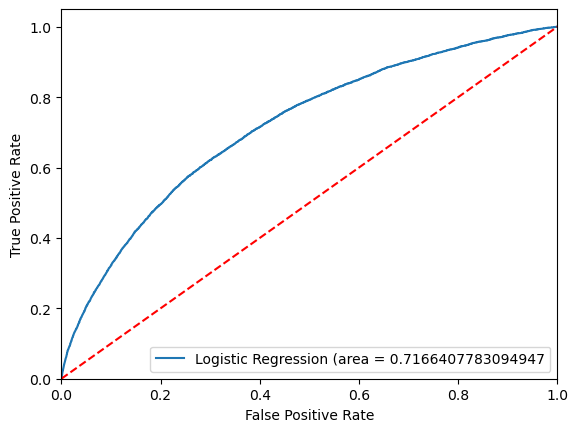

In [74]:
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {lr_roc_auc}')
plt.plot([0,1], [0,1], 'r--') 
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

At this point, the model should produce a result around 0.67 

**Don't change anything in this cell, just make it run correctly**

In [75]:
if isinstance(lr_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if lr_roc_auc >= 0.63:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
### Complete in this cell: train a RandomForestClassifier
### Assgign to `rf`
rf = RandomForestClassifier(n_jobs=-1)

In [78]:
rf.fit(train_data, y_train)

RandomForestClassifier(n_jobs=-1)

3.5. Use the classifier to predict probabilities on the test set.



In [79]:
### Complete in this cell: predict test data and store in
predict_probabilities = rf.predict_proba(test_data)
predict_probabilities[:10]

array([[0.91, 0.09],
       [0.91, 0.09],
       [0.84, 0.16],
       [0.89, 0.11],
       [0.84, 0.16],
       [0.99, 0.01],
       [0.89, 0.11],
       [0.86, 0.14],
       [0.87, 0.13],
       [0.92, 0.08]])

3.6. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [80]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_roc_auc` variable.
rf_roc_auc = roc_auc_score(y_test, predict_probabilities[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_probabilities[:,1])

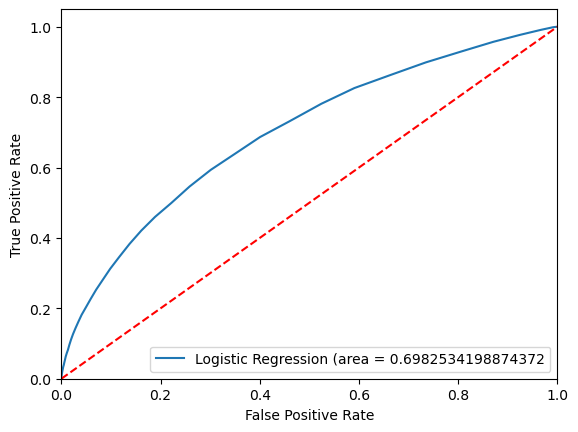

In [81]:
plt.figure()
plt.plot(fpr_rfc, tpr_rfc, label=f'Logistic Regression (area = {rf_roc_auc}')
plt.plot([0,1], [0,1], 'r--') 
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

At this point, the model should produce a result around 0.7

**Don't change anything in this cell, just make it run correctly**

In [82]:
if isinstance(rf_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_roc_auc >= 0.66:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


3.7. Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

Assign the trained model to `rf_random` variable.

In [83]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [84]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination 
### of hyperparameters for a RandomForestClassifier.
### Assign the model to `rf_random`
parameters = {'n_estimators':[45, 50, 55],
                'criterion':['gini', 'entropy', 'log_loss']
}
rf_random = RandomizedSearchCV(estimator=rf, n_iter=10, param_distributions=parameters, cv=5, scoring='roc_auc')

In [85]:
# Time calculation
start_time = time.time()

# Fit model
rf_random.fit(train_data, y_train)

# Time calculation
time_rfrandom = (time.time() - start_time)
print(f'Exuction time in minutes: {time_rfrandom/60}')
print(f'Best parameters: {rf_random.best_params_}')
print(f'Model definition: {rf_random.best_estimator_}')

c:\Users\Cesan\miniconda3\envs\santireds\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Exuction time in minutes: 39.67483536402384
Best parameters: {'n_estimators': 55, 'criterion': 'entropy'}
Model definition: RandomForestClassifier(criterion='entropy', n_estimators=55, n_jobs=-1)


3.8. Use the classifier to predict probabilities on the test set.


In [86]:
### Complete in this cell: predict test data and save csv
rf_probabilities = rf_random.best_estimator_.predict_proba(test_data)
rf_probabilities[:10]

array([[0.96363636, 0.03636364],
       [0.96363636, 0.03636364],
       [0.90909091, 0.09090909],
       [0.96363636, 0.03636364],
       [0.63636364, 0.36363636],
       [0.96363636, 0.03636364],
       [0.90909091, 0.09090909],
       [0.89090909, 0.10909091],
       [0.90909091, 0.09090909],
       [0.89090909, 0.10909091]])

3.9. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_tuned_roc_auc` variable.

In [87]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_tuned_roc_auc` variable.
rf_tuned_roc_auc = roc_auc_score(y_test, rf_probabilities[:,1])
fpr_rfc_rs, tpr_rfc_rs, thresholds_rfc_rs = roc_curve(y_test, rf_probabilities[:,1])

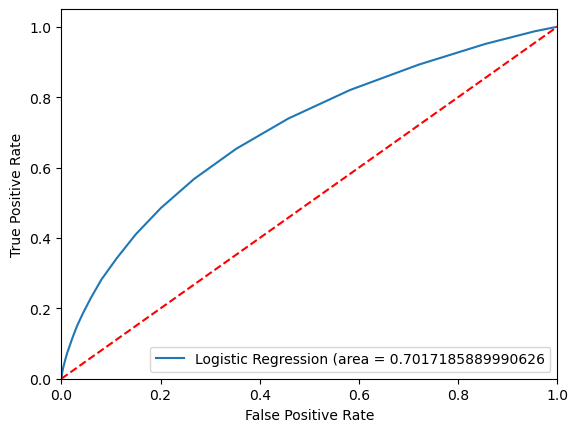

In [88]:
plt.figure()
plt.plot(fpr_rfc_rs, tpr_rfc_rs, label=f'Logistic Regression (area = {rf_tuned_roc_auc}')
plt.plot([0,1], [0,1], 'r--') 
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

At this point, the model should produce a result around 0.7 or higher.

**Don't change anything in this cell, just make it run correctly**

In [89]:
if isinstance(rf_tuned_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_tuned_roc_auc >= 0.7:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


3.10. Optional: If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

3.11. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [90]:
### Complete in this cell: train a LightGBM model


### Optional: Using Scikit Learn Pipelines 

3.12. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [91]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training
